<font size="4">**Business Analytics Project**</font><br> 
<font size="4">**by Jacques BONA<font size="4">**

**Introduction** <br>
The goal of this project is to get an experience of  using various Business Analytics tools such as Cohort Analysis/ User Metrics/ Unit Economics/ Metrics and Funnels in a practical environment in order to provide some suggestions on how to optimize marketing expenses.

## <u>**Project description**</u> <br>
You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. <br>
Your first task is to help optimize marketing expenses.<br>
You have:
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics
<br>

You are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

## <u>**Data description**</u> <br>

**The visits table (server logs with data on website visits):**
* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from<br>
All dates in this table are in YYYY-MM-DD format.
<br>

**The orders table (data on orders):**
* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order<br>

**The costs table (data on marketing expenses):**
* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day

##  <u>**Open the data file and study the general information.**</u> 

In [1]:
#import libraries
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###  <u>**Store the data on visits, orders, and expenses in variables**</u> 

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### <u>**Study the data for analysis:Visits**</u> 

In [3]:

visits.info()

#overall shape analysis
count_row = visits.shape[0]  # Gives number of rows
print ('Number of rows in this  dataset = {}'.format(count_row))
print ('---------------------------------------------------------')
count_col = visits.shape[1]  # Gives number of columns
print ('Number of columns in this  dataset = {}'.format(count_col))
print ('---------------------------------------------------------')
#percentage of missing values for each category in %
print ('missing values in each column')

(visits.isna().sum())/len(visits)*100

visits.sample(10)


#check all the unique values in a column for correct data type optimisation 
unique_counts = pd.DataFrame.from_records([(col, visits[col].nunique()) for col in visits.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
Number of rows in this  dataset = 359400
---------------------------------------------------------
Number of columns in this  dataset = 5
---------------------------------------------------------
missing values in each column


Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64

,Device,End Ts,Source Id,Start Ts,Uid
48433,desktop,2017-06-30 09:17:00,3,2017-06-30 09:15:00,6564844066446386374
133302,desktop,2018-02-25 22:47:00,3,2018-02-25 21:28:00,11494624937090148895
353836,touch,2017-10-11 01:08:00,5,2017-10-11 00:41:00,7207880667674991861
137000,desktop,2018-05-14 11:32:00,2,2018-05-14 11:24:00,8056418121947262981
58962,desktop,2017-07-20 14:59:00,3,2017-07-20 14:50:00,5383364661488228653
280095,desktop,2018-04-28 09:27:00,4,2018-04-28 09:26:00,1142276235741247981
171581,desktop,2017-09-25 18:10:00,5,2017-09-25 17:52:00,3184899318473266967
222691,desktop,2017-10-06 21:49:00,5,2017-10-06 21:47:00,7708948947542723187
36243,desktop,2017-10-31 15:09:00,4,2017-10-31 14:57:00,11789553009930129476
196846,desktop,2017-09-15 15:17:00,3,2017-09-15 15:15:00,1028273338213428128


,Column_Name,Num_Unique
0,Device,2
2,Source Id,9
3,Start Ts,224303
1,End Ts,224760
4,Uid,228169


From the output we can see that the visit table contains 5 columns and 359400 rows, there are no missing values.<br>
There is room for optimisation of memory by changing the datatype.<br>
Because of the low number of unique values in columns Device and Source ID we could convert them from non-null object
to converted to categorical.<br>
In addition, the date fields should not be converted to categorical but to pd.to_datetime.<br>
Finally we can also convert Uid from uint64(1) to int64 for performance enhancement.<br>


### <u>**Study the data for analysis:Orders**</u> 

In [4]:

orders.info()

#overall shape analysis
count_row = orders.shape[0]  # Gives number of rows
print ('Number of rows in this  dataset = {}'.format(count_row))
print ('---------------------------------------------------------')
count_col = orders.shape[1]  # Gives number of columns
print ('Number of columns in this  dataset = {}'.format(count_col))
print ('---------------------------------------------------------')
#percentage of missing values for each category in %
print ('missing values in each column')

(orders.isna().sum())/len(orders)*100

orders.sample(10)


#check all the unique values in a column for correct data type optimisation 
unique_counts2 = pd.DataFrame.from_records([(col, orders[col].nunique()) for col in orders.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
Number of rows in this  dataset = 50415
---------------------------------------------------------
Number of columns in this  dataset = 3
---------------------------------------------------------
missing values in each column


Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

,Buy Ts,Revenue,Uid
49223,2018-05-28 00:55:00,0.85,5299793535781063977
48058,2018-05-19 20:47:00,7.33,13118553138703483207
38759,2018-03-07 15:14:00,0.79,8668273609061481289
43436,2018-04-08 00:03:00,1.47,10026143329760208697
1168,2017-06-09 16:42:00,5.00,7213209211135502359
34483,2018-02-13 09:32:00,2.44,17681142845682350288
10684,2017-10-04 22:08:00,4.44,17558173184694021784
38662,2018-03-07 11:26:00,2.14,8924852249548705191
9167,2017-09-26 15:08:00,3.67,8446261814024207158
26917,2017-12-29 12:59:00,0.49,13970840861188311397


,Column_Name,Num_Unique
1,Revenue,1149
2,Uid,36523
0,Buy Ts,45991


In this output the order table contains 3 columns and 50415 rows, there are no missing values.<br>
There is also room for optimisation of memory by changing the datatype.<br>
The date fields Buy Ts	 should  be converted  to pd.to_datetime.<br>


### <u>**Study the data for analysis:Costs**</u> 

In [5]:

costs.info()

#overall shape analysis
count_row = costs.shape[0]  # Gives number of rows
print ('Number of rows in this  dataset = {}'.format(count_row))
print ('---------------------------------------------------------')
count_col = costs.shape[1]  # Gives number of columns
print ('Number of columns in this  dataset = {}'.format(count_col))
print ('---------------------------------------------------------')
#percentage of missing values for each category in %
print ('missing values in each column')

(costs.isna().sum())/len(costs)*100

costs.sample(10)


#check all the unique values in a column for correct data type optimisation 
unique_counts3 = pd.DataFrame.from_records([(col, costs[col].nunique()) for col in costs.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
Number of rows in this  dataset = 2542
---------------------------------------------------------
Number of columns in this  dataset = 3
---------------------------------------------------------
missing values in each column


source_id    0.0
dt           0.0
costs        0.0
dtype: float64

,source_id,dt,costs
2489,10,2018-04-09,16.25
940,3,2018-01-01,364.64
776,3,2017-07-21,410.71
2194,10,2017-06-16,6.76
1543,5,2017-08-31,87.25
1764,5,2018-04-10,116.01
1235,4,2017-10-25,235.48
1039,3,2018-04-12,221.52
2371,10,2017-12-10,17.58
577,2,2018-01-01,113.13


,Column_Name,Num_Unique
0,source_id,7
1,dt,364
2,costs,2396


In this output the order table contains 3 columns and 2542 rows, there are no missing values.<br>
There is also room for optimisation of memory by changing the datatype.<br>
Source ID can converted them from non-null object to categorical due to low number of unique values.<br>
The date fields dt	 should not be converted to categorical but to pd.to_datetime.<br>

Finally in all files we noticed the format of the column titles is not displayed properly as a variable we have some capital letters, sometimes it is not very precised: we need to fix it as well.

##  <u>**Optimization of data for analysis.**</u> 

###  <u>**Column renaming**</u> 

In [6]:
#Visits
visits.rename(columns={'Device':'device', 'Start Ts':'session_start','End Ts':'session_end','Source Id':'source_id','Uid':'uid'}, inplace=True)
visits.columns

Index(['device', 'session_end', 'source_id', 'session_start', 'uid'], dtype='object')

In [7]:
#Orders 
orders.rename(columns={'Uid':'uid', 'Buy Ts':'order_date','Revenue':'revenue_per_order'}, inplace=True)
orders.columns

Index(['order_date', 'revenue_per_order', 'uid'], dtype='object')

In [8]:
#costs
costs.rename(columns={'dt':'date', 'costs': 'cost_per_day'}, inplace=True)
costs.columns

Index(['source_id', 'date', 'cost_per_day'], dtype='object')

We fixed the columns name to have a consistent format of columns titles

###  <u>**Data type correction**</u> 

In [9]:
#Visits
visits['device']= visits['device'].astype('category')
visits['source_id']= visits['source_id'].astype('category')
 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.dtypes
visits.info()

device                 category
session_end      datetime64[ns]
source_id              category
session_start    datetime64[ns]
uid                      uint64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device           359400 non-null category
session_end      359400 non-null datetime64[ns]
source_id        359400 non-null category
session_start    359400 non-null datetime64[ns]
uid              359400 non-null uint64
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


After data type correction,we have optimized the memory usage by 35%  from 13.7MB to 8.9 MB

In [10]:
#orders
 
orders['order_date'] = pd.to_datetime(orders['order_date'])

orders.dtypes
orders.info()

order_date           datetime64[ns]
revenue_per_order           float64
uid                          uint64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
order_date           50415 non-null datetime64[ns]
revenue_per_order    50415 non-null float64
uid                  50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


After data type correction,we have same proportion of memory usage 1.2MB.

In [11]:
#costs
costs['source_id']= costs['source_id'].astype('category')
costs['date'] = pd.to_datetime(costs['date'])
costs.dtypes
costs.info()

source_id             category
date            datetime64[ns]
cost_per_day           float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id       2542 non-null category
date            2542 non-null datetime64[ns]
cost_per_day    2542 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


After data type correction,we have optimized the memory usage by 28%  from 59.7MB to 42.7 MB

###  <u>**Data Analysis preparation**</u> 

We can start preparing our data to be able later to extract the information needed.

####  <u>**Data Analysis preparation: Visits**</u> 

In [12]:
# Extract date from column ['session_start'] to create new column visits['session_date']
visits['session_date'] = visits.session_start.dt.date
visits['session_date'].head(5)

0    2017-12-20
1    2018-02-19
2    2017-07-01
3    2018-05-20
4    2017-12-27
Name: session_date, dtype: object

In [13]:
visits['session_year'] = visits.session_date.astype('datetime64[Y]')
visits['session_month'] =visits.session_date.astype('datetime64[M]')

visits['session_week'] = visits.session_date.astype('datetime64[W]')
 

From this column now we will be able to extract further  time  data for each user that we will then join to the visits dataframe

For metrics purposes we can be interested in knowing the time that elapses between registration(session_date) and first session date to get an estimation of lifetime value.


In [14]:
visits

,device,session_end,source_id,session_start,uid,session_date,session_year,session_month,session_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-01-01,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-01-01,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-01-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-01-01,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-01-01,2017-12-01,2017-12-21
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-01-01,2017-07-01,2017-07-27
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-01,2018-01-01,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-01-01,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-01-01,2017-11-01,2017-11-02


####  <u>**Data Analysis preparation: Orders**</u> 

In [15]:
orders

,order_date,revenue_per_order,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [16]:
# Extract date from column ['order_date'] to create 3 new columns ['order_day'] /['order_week'] /['order_month]
orders['order_day'] = orders['order_date'].astype('datetime64[D]')
orders['order_week']= orders['order_date'].astype('datetime64[W]')
orders['order_month']= orders['order_date'].astype('datetime64[M]')
 
orders['order_year']= orders['order_date'].astype('datetime64[Y]')

In [17]:
orders.sample(5)

,order_date,revenue_per_order,uid,order_day,order_week,order_month,order_year
44948,2018-04-21 15:24:00,4.28,5311789295122823962,2018-04-21,2018-04-19,2018-04-01,2018-01-01
43969,2018-04-13 14:44:00,3.67,7112054306234452279,2018-04-13,2018-04-12,2018-04-01,2018-01-01
23832,2017-12-13 15:00:00,1.83,4435931324057795549,2017-12-13,2017-12-07,2017-12-01,2017-01-01
20251,2017-11-26 12:11:00,2.44,8469670378075535297,2017-11-26,2017-11-23,2017-11-01,2017-01-01
33061,2018-02-05 15:52:00,1.47,9958359745730821547,2018-02-05,2018-02-01,2018-02-01,2018-01-01


####  <u>**Data Analysis preparation: Cost**</u> 

In [18]:
#extracting  month for the date 
costs['month_cost'] = costs.date.dt.month
costs['year_cost']  = costs.date.dt.year
costs.head()

,source_id,date,cost_per_day,month_cost,year_cost
0,1,2017-06-01,75.20,6,2017
1,1,2017-06-02,62.25,6,2017
2,1,2017-06-03,36.53,6,2017
3,1,2017-06-04,55.00,6,2017
4,1,2017-06-05,57.08,6,2017


####  <u>**Data Analysis cleaning**</u> 

In [19]:
#check missing values in each table 
visits.isnull().sum()
orders.isnull().sum()
costs.isnull().sum()

device           0
session_end      0
source_id        0
session_start    0
uid              0
session_date     0
session_year     0
session_month    0
session_week     0
dtype: int64

order_date           0
revenue_per_order    0
uid                  0
order_day            0
order_week           0
order_month          0
order_year           0
dtype: int64

source_id       0
date            0
cost_per_day    0
month_cost      0
year_cost       0
dtype: int64

No missing values detected in each table 

In [20]:
orders.describe()

,revenue_per_order,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


The revenue per order is around 5 , with a min of 0 which can indicate a free download and a max of 2633.
Here again we see  a significant difference between the mean and the median.

In [21]:
costs.describe()

,cost_per_day,month_cost,year_cost
count,2542.000000,2542.000000,2542.000000
mean,129.477427,6.541306,2017.410700
std,156.296628,3.450508,0.492058
min,0.540000,1.000000,2017.000000
25%,21.945000,4.000000,2017.000000
50%,77.295000,7.000000,2017.000000
75%,170.065000,10.000000,2018.000000
max,1788.280000,12.000000,2018.000000


For the cost per day , the average is 129 and a median of 77.2 which also highlights a significant difference.<br> We have a min of 0.54 and a max of 1788.

In [22]:
#Checking duplicates in dataframes 

visits.duplicated().sum()
orders.duplicated().sum() 
costs.duplicated().sum()

0

0

0

We didn't find any duplicates values in the tables 

####  <u>**Conclusion**</u> 

In this section we managed to fix the columns name to have a consistent format of columns titles.<br>
Then we brought some correction to the datatype in each table in oder to have a standard accross the tables and also to reduce the memory usage.<br>
We also prepared the data by converting the dates values into the right type.<br>
Tis preparation work and some grouping enabled us to perform some join between the tables in order to get more detailed information.<br>
In the joined tables we needed to rearrange the columns to have a clarity in the display.<br>
Finally we didn't find any missing values but we noticed some big differences between the means and the medians in every single table which indicates that the data is skewed. <br>
We didn't find any duplicates values in the tables.<br>
We are going now to investigate further with reports and metrics.


##  <u>**Reports and metrics Calculation**</u> 

### <u>**Product**</u> 
* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* How often do users come back?

#### <u>**Daily Active user : DAU**</u> 

Usally  Daily active users are calculated using the total number of unique users on a particular day.<br>
We make the choice to choose the visits table and not orders because using the platform doesn't imply systematically purchasing something.<br>
We consider active user the user who opens the app in a day: it gives us an accurate reading of how many unique visitors we are getting on a daily basis.<br>
The calculation is  based on unique individual, not sessions. <br>


In [23]:
dau_total = visits.groupby(['session_date']).agg({'uid': ['nunique']}).mean().round()
dau_total

uid  nunique    908.0
dtype: float64

We have on average 908 daily users on the platform.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


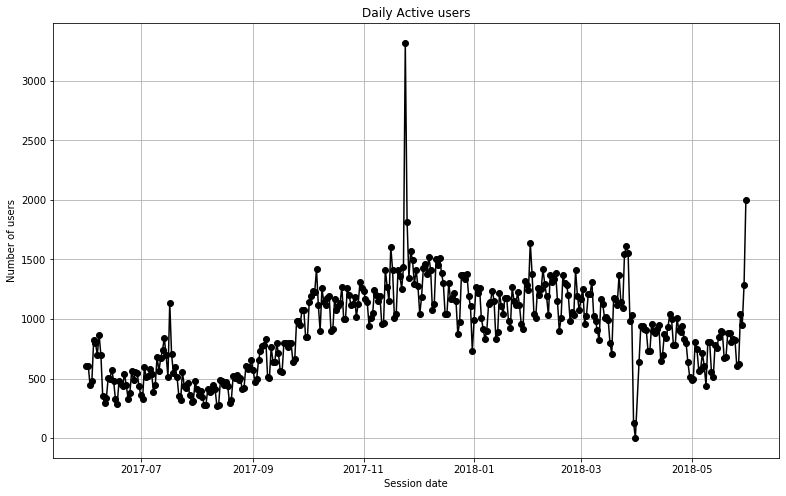

In [24]:
dau_total_graph = visits.groupby(['session_date']).agg({'uid': ['nunique']})
ax = plt.subplots(figsize=(13,8))
plt.plot(dau_total_graph,'-ok')
plt.title('Daily Active users') 
plt.ylabel('Number of users')
plt.xlabel('Session date')
plt.grid()
plt.show();


We have a fluctuation in the number of users over the time between 500 and 1500 users with a peak in december 2017 with  3319 users. <br> 
This peak could have been triggered by End of the Year celebrations which can be seen as a positive element to attract more users at this time of the year. <br> If it happens on a frequent basis over the years it could be then interesting to work further on marketing campaigns dedicated to that period.<br> 
On the other end we have a drastic drop in april 2018 until reaching 0, this is also cumulated with a fall in the Stock of 15.4% for Yandex at the same period.<br> 
Reaching the zero level indicates that  a technical issue in the servers occured such as a crash.
The other reason behind the fall  could be that  the sanctions imposed by US against Russian oligarchs and government officials,  have led to bitter reactions from users and investors in Russian companies.<br>

#### <u>**Weekly Active user :WAU**</u> 


It is a weekly version of DAU,we consider it as  the number of weekly unique users.


In [25]:
wau_total = visits.groupby(['session_week']).agg({'uid':['nunique']}).mean().round() 
wau_total

uid  nunique    5724.0
dtype: float64

In [26]:
# the reviewer code:

# with year gruping:
print(len(visits.groupby(['session_year','session_week'])['session_week']))

# without year grouping
len(visits.groupby(['session_week'])['session_week'])

54


53

In [27]:
# the reviewer code:
print(visits['session_week'].max())
visits.query('session_week == "2018-05-31"')['session_date'].unique()

2018-05-31 00:00:00


array([datetime.date(2018, 5, 31)], dtype=object)

In [28]:
# the reviewer code:
visits.query('session_week != "2018-05-31"').groupby(['session_week']).agg({'uid':['nunique']}).mean().round() 

uid  nunique    5796.0
dtype: float64

We have on average 5724 users on the platform on a weekly basis.

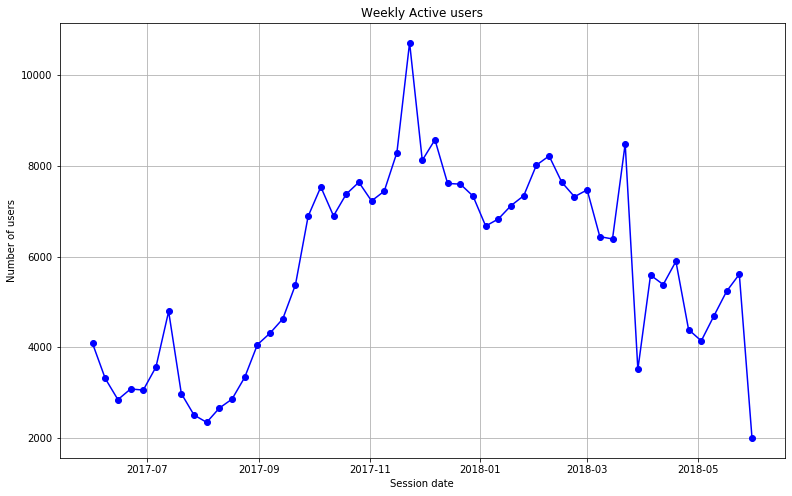

In [29]:
 
wau_total_graph = visits.groupby(['session_week']).agg({'uid': ['nunique']})
ax = plt.subplots(figsize=(13,8))
plt.plot(wau_total_graph,'-ob' )
plt.title('Weekly Active users') 
plt.ylabel('Number of users')
plt.xlabel('Session date')
plt.grid()

plt.show();

There is a massive difference in the weekly number of users compared to DAU with a  staggering increase of 529%.<BR>
We noticed a peak around 10716 users in December 2017 in the same propotion as the DAU caused by Christmas.<BR>
Then we observed a sharp decrease in April 2018 due to US sanctions and a potential crash in servers.<BR>
Finally there is a drastic decrease in the traffic in June 2018 which links to the 2018 FIFA World Cup In Russia which was a major event worlwide.<BR>

#### <u>**Monthly Active user : MAU**</u> 

Monthly Active Users (MAU) is a measurement for the number of unique users over a 30-day period. <br>
Thanks to this metric, we will have already an indication of the capability to attract and retain users over time.

In [30]:
mau_total = visits.groupby(['session_year','session_month']).agg({'uid':['nunique']}).mean().round() 
mau_total

uid  nunique    23228.0
dtype: float64

We have on average 23228.0 users on the platform on a monthly basis.

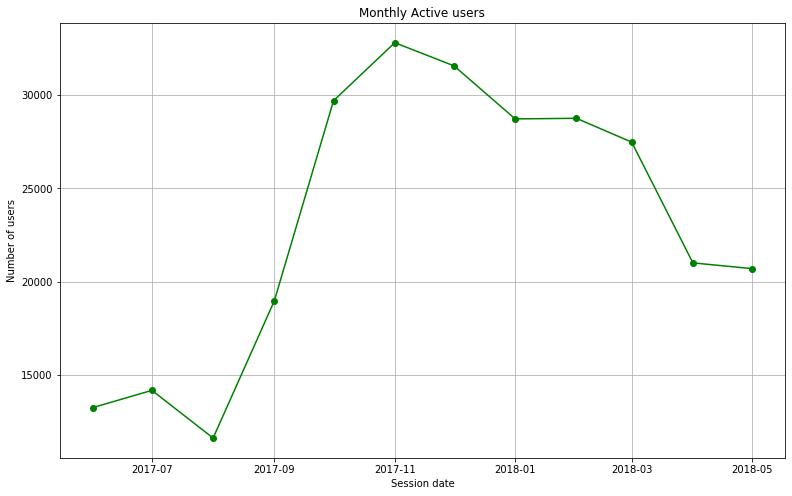

In [31]:
 
mau_total_graph = visits.groupby(['session_month']).agg({'uid': ['nunique']})
ax = plt.subplots(figsize=(13,8))
plt.plot(mau_total_graph,'-og')
plt.title('Monthly Active users') 
plt.ylabel('Number of users')
plt.xlabel('Session date')
plt.grid()

plt.show();

We have again in increase in the number of users on a monthly basis with an average of 23228 which is an increase of 313 % compared to WAU.<br>
The min number of user is 11631 in summer time and the maximun is 32797 around the end of the year in November.<br>
It seems that people use less the platform in summer but more during the winter, there is a big factor of seasonality.  <br>



#### <u>**DAU/MAU : Product Stickiness Ratio**</u> 

The DAU to MAU ratio quantifies the proportion of monthly active users who engage with the platform in a 24-hour time period.<br>
It’s the ratio of your daily active users over your monthly active users, expressed as a percentage. <br>
We tend to consider that  apps over 20% are good, and 50%+  world class.<br>

In [32]:
# calculate Daily Active Users to Monthly Active Users Ratio
data = {'DAU':[908],
        'WAU':[5622],
        'MAU':[23228]}
# Create DataFrame
df = pd.DataFrame(data)
df['Sticky_MAU'] = ((df['DAU']/df ['MAU'])*100) .round()
df

,DAU,WAU,MAU,Sticky_MAU
0,908,5622,23228,4.0


We have a  DAU/MAU Ratio  of 4% which is quite low in the industry but it doesn't mean it is an unsuccessful product.<br>  It could be a product that we might not use often on a daily basis but  rather on weekly basis.<br>
Also it could be the fact that some ouliers are skewing the distribution.<br>
Another reason is that some percentage of the  daily users  could be new users who might never come back. So, it ends up inflating  MAU in comparison to average DAU and consequently  may lead to a lower Product Stickiness Ratio.<br>
The downside to the DAU/MAU Ratio is that we can’t really  see which users are being retained and which users are churning.<br>
One suggestion we can make could be the implementation of  emails and push notifications.<br>
Let's see the WAU/MAU to compare.<br>

#### <u>**WAU/MAU : Product Stickiness Ratio 2**</u> 

WAU/MAU performs the same analysis at our user base but just a different time frame.

In [33]:
data2 = {'DAU':[908],
        'WAU':[5622],
        'MAU':[23228]}
# Create DataFrame
df2 = pd.DataFrame(data)
df2['Sticky_WAU'] = ((df2['WAU']/df2 ['MAU'])*100) .round()
df2

,DAU,WAU,MAU,Sticky_WAU
0,908,5622,23228,24.0


We have a higher ratio with  WAU/MAU Ratio of 24% which confirms the trend that the app attracts users more on a weekly basis than daily.<br>
24% is a satifying number in the industry in term of user engagement.<br>

#### <u>**Calculation of number of sessions per day**</u> 

In [34]:
nb_sessions_sum = visits.groupby('session_date')['uid'].nunique().sum()
nb_sessions_sum

330509

In [35]:
#breaking nb_sessions per day 
nb_sessions  = visits.groupby('session_date')['uid'].nunique()
nb_sessions.sample(10)


session_date
2018-01-09    1128
2018-05-31    1997
2017-08-10     446
2018-03-02    1253
2017-06-11     292
2018-05-04     745
2017-07-21     517
2018-05-15     755
2018-03-01    1166
2018-02-11    1030
Name: uid, dtype: int64

In [36]:
# amount of user sessions per day
nb_users_sessions_per_day = visits.groupby('session_date')['uid'].count()
nb_users_sessions_per_day .sample(15)

session_date
2017-08-07     444
2018-04-14     690
2018-05-14     858
2018-01-14     964
2017-09-15     774
2017-11-22    1374
2017-07-09     475
2018-04-29     670
2018-03-18     773
2017-11-07    1326
2018-03-22    1467
2017-07-10     749
2017-06-14     547
2017-06-09     755
2017-06-30     473
Name: uid, dtype: int64

In [37]:
# average amount of user sessions per day 
print('Average number of user sessions per day:', nb_users_sessions_per_day .mean().round())


Average number of user sessions per day: 987.0


In [38]:
nb_users_sessions_per_day .describe()


count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: uid, dtype: float64

We have in total 330509 sessions over the time with an average of 987 sessions per day.<br>
The median is 1003 sessions.<br>
The min is 1 and the maximum is 4042 sessions.<br>

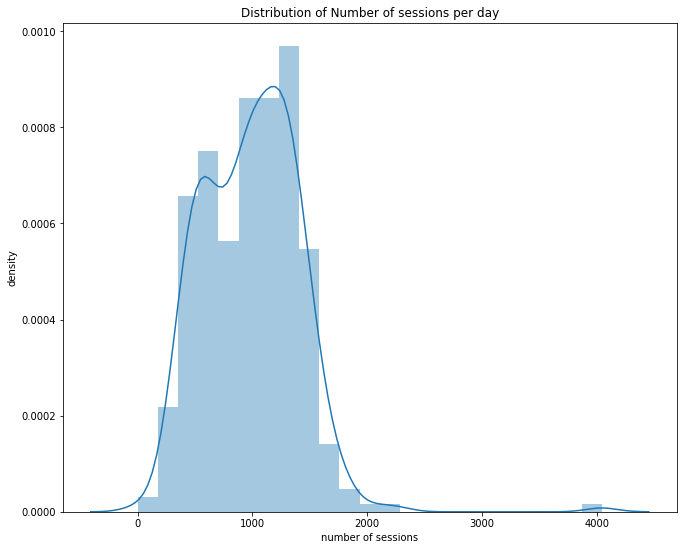

In [39]:
#graphic representation distplot
ax = plt.subplots(figsize=(11,9))
sns.distplot(nb_users_sessions_per_day )
plt.title('Distribution of Number of sessions per day')
plt.ylabel('density')
plt.xlabel('number of sessions');

We can see that the number of the sessions per day stands mostly  between 0 and 2000.<br>
We can see one outlier over 4000 sessions.<br>
The distribution is more or less normal with some peaks corresponding to the average,median and few modes.<br>
The mode indicates the most frequent score in our data set:it represents the highest bar as it could be the most popular value observed.

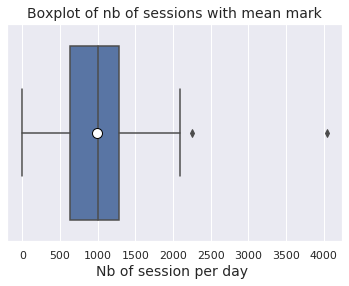

In [40]:
#graphic representation boxplot
sns.set(style="darkgrid")
sns.boxplot(nb_users_sessions_per_day,orient="h",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Nb of session per day ", size=14)
plt.title("Boxplot of nb of sessions with mean mark", size=14);

On this graph we can see clearly the single outsider with 3319 sessions, the mean and the median are very close 907-921 which indicates that the distribution is not much skewed.

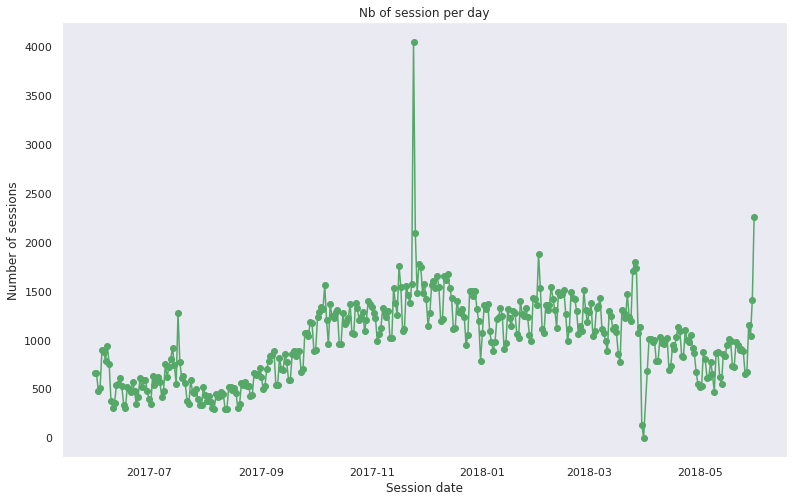

In [41]:
#distribution graph Nb of session per day

 
ax = plt.subplots(figsize=(13,8))
plt.plot(nb_users_sessions_per_day,'-og')
plt.title('Nb of session per day') 
plt.ylabel('Number of sessions')
plt.xlabel('Session date')
plt.grid()

plt.show();

We have similar proportions of values as the DAU with a peak in December 2017 triggered by End of the Year celebrations and a drop in April 2018 caused by a potential crash in the servers.

####  <u>**Calculation of duration of each session**</u> 

In [42]:
#sessions length
#we choose the format in seconds as it would be easier for reading results
length_session = (visits['session_end']- visits['session_start']).dt.total_seconds()
length_session.describe()
length_session.mode()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
dtype: float64

0    60.0
dtype: float64

We can see that the mean is 643 seconds or 10 min for the length  of each session. The median is  300 seconds or 5 minutes.<br>
We have a negative value in the min -2760s, it could be  a crash in the system or an error in the entry.<br>
The max is 42660s or 11 hours.<br>

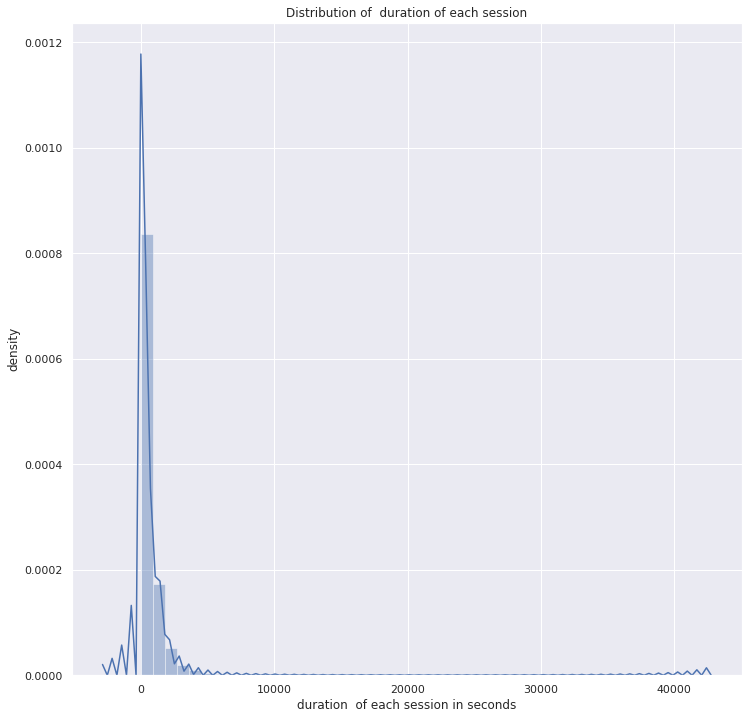

In [43]:
ax = plt.subplots(figsize=(12,12))
sns.distplot(length_session)
plt.title('Distribution of  duration of each session')
plt.ylabel('density')
plt.xlabel('duration  of each session in seconds');

Most of the durations are between 0 and 840 seconds or 0 and 14 minutes.<br>
The mode is about 60 seconds or 1 minute which is very far from the mean 643s, it is the highest point on the graph.<br>
Also the max is over 11 hours which is really extreme in that type of situation.<br>
Both reasons  explain why we have a skewed distribution.<br>



#### <u>**Retention rate : How often do users come back?**</u> 


The retention rate tells you how many users from a cohort have remained active compared to their initial number.<br>
The longer a customer uses the product, the greater the potential revenue.<br>
For that purpose we chose to work with the orders table as we really want to have a picture of active users purchasing.

In [44]:
#Next code takes a bit of time for some reasons

In [45]:
#create new dataframe first_session to extract data of first session visit

first_session = visits.groupby('uid')['session_date'].min().reset_index()


#Renaming column session_date to 'first_session_date'
first_session=first_session.rename(columns={'session_date':'date_first_session'})


#Extracting months and year  for the first session as we take into accounts years 2017 and 2018
first_session['month_first_session'] = first_session['date_first_session'].astype('datetime64[M]')

#Extracting week for the first session
first_session['week_first_session']= first_session['date_first_session'].astype('datetime64[W]')


#Extracting year for the first session
first_session['session_year']  =first_session['date_first_session'].astype('datetime64[Y]')
 


#Merging dataframe dates_first_session to visits 
orders = orders.merge(first_session, on='uid')



In [46]:
orders.head(5)

,order_date,revenue_per_order,uid,order_day,order_week,order_month,order_year,date_first_session,month_first_session,week_first_session,session_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01


In [47]:
#extracting month of first order's date 
first_orders = orders.groupby('uid')['order_date'].min().reset_index()

In [48]:
#merging dataframe first_orders to orders dataframe
orders = orders.merge(first_orders, on='uid', how='left')


In [49]:
#renaming column [order_date] and converting it to datetime64[M]
orders.rename(columns={'order_date_y': 'month_first_order'}, inplace=True)
orders['month_first_order'] = orders['month_first_order'].astype('datetime64[M]')
orders.head()


,order_date_x,revenue_per_order,uid,order_day,order_week,order_month,order_year,date_first_session,month_first_session,week_first_session,session_year,month_first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01


In [50]:
cohort= (orders
.groupby(['month_first_order', 'order_month'], as_index=False)
.agg({'uid': 'nunique'})
.rename(columns={'uid':'users'}))


In [51]:
cohort['lifetime'] = (
    ((cohort.order_month - cohort.month_first_order) / np.timedelta64(1, 'M')
    ).round().astype('int')
)

In [52]:
#preparation pivot table 
retention_rate = cohort.pivot_table(index='month_first_order',
                       columns='lifetime',
                       values='users',
                       aggfunc='sum').fillna(0)  # replacing NAN 

#Divide the number of active users in each week by the initial number of users in the cohort:
retention_rate= retention_rate.apply(lambda x: x / x[0], axis=1)
retention_rate.index = pd.Series(retention_rate.index).dt.strftime('%Y-%m')

retention_rate.head(5)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,
2017-06,1.0,0.030153,0.024716,0.026693,0.043500,0.033119,0.030648,0.023233,0.028670,0.022244,0.022244,0.026199
2017-07,1.0,0.027041,0.029641,0.033281,0.025481,0.019761,0.018721,0.020281,0.021841,0.011440,0.013521,0.000000
2017-08,1.0,0.042336,0.038686,0.032117,0.029197,0.023358,0.021898,0.032117,0.013869,0.022628,0.000000,0.000000
2017-09,1.0,0.050368,0.038745,0.028671,0.020147,0.024797,0.025571,0.014336,0.016660,0.000000,0.000000,0.000000
2017-10,1.0,0.047465,0.028341,0.021198,0.021429,0.016590,0.012903,0.015438,0.000000,0.000000,0.000000,0.000000


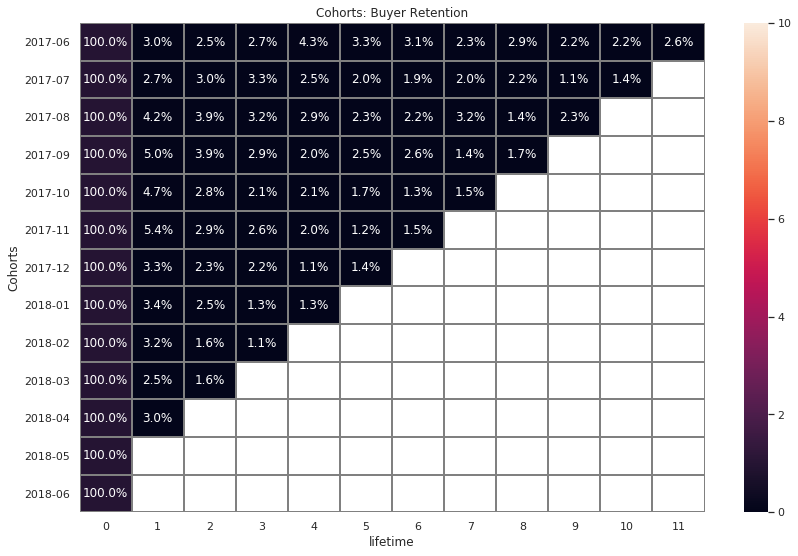

In [53]:
#creation heatmap 
 
sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: Buyer Retention')

sns.heatmap(
    retention_rate, annot=True, fmt='.1%', linewidths=1, linecolor='gray',mask=retention_rate==0,
vmax=10) 
plt.ylabel('Cohorts');

In [54]:
#Average retention_rate : we take into account the first month of each cohort as most of them have an incomplete lifetime
retention_rate_mean = retention_rate[1].mean()*100
print(retention_rate_mean) 
 

3.130620861011741


<div class="alert alert-info"> 
<b>Corrected</b> 

In [55]:
print('{:.1%}'.format(retention_rate[1].mean()))

3.1%


As we can see also the mean of the retention rate is very low across the lifetime.

<u>**Analysis retention heatmap**</u> <br>
The retention heatmap shows exactly how many users we are losing and when. <br>
This visualisation shows us the percentage (%) of new users that continue to  make a purchase each month over 11 months.<br>
Also  it creates a cohort of new users every month.<br>
Each cohort is losing a huge amount of users on the first month between 95-97% and further in the next months<br>
The 2 first cohorts  june and July 2017 seem to be the only one  surviving over the time :
* in the first cohort we go   from 3% in the first month   to 2.6 % in the  11th month with few increases  during the year 
<br>
* in the second cohort we have similar scenario going   from 2.7% in the first month   to 1.4 % in the 10th month with few increases  during the year <br>

Overall it is not very easy to draw direct conclusions from the return rate at this stage because we observed several variations and patterns across the different cohorts.<br>

Our number can go down in one month and up in another month if a for example a user "skips" purchasing in a particular month.  <br>
For example, the month they didn't purchase will reduce the percentage for that month then it will increase because of the next purchase they had the following month.<br>


<u>**Conclusion**</u> <br>
In this section we managed to find the daily,weekly, and monthly number of visiting users and we noticed that there was a better Product Stickiness Ratio on a weekly basis around 24%.<br>
We found in average 987 users sessions  per day and most of them have a duration between  0 and 14 minutes.<br>
Finally we focused on the active users purchasing and we observed a very low retention rate dropping from 95-97% during the first month.<br>

 

### <u>**Sales**</u> 

* When do people start buying?
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? (LTV)

#### <u>**When do people start buying?**</u> 

In [56]:
orders.head()


,order_date_x,revenue_per_order,uid,order_day,order_week,order_month,order_year,date_first_session,month_first_session,week_first_session,session_year,month_first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01


In [57]:
#We create a column where we will see the time elasped in days between the visit and the purchase from a specific user.
orders['date_first_session']=pd.to_datetime(orders['date_first_session'])
orders['conversion'] = np.floor(((orders.order_day - orders.date_first_session) /\
                             np.timedelta64(1, 'D'))).astype('int')
#find average 
orders['conversion'].mean()

37.02796786670634

According to the result it seems that in average people start buying after 37 days but this number seems high so we need to investigate further as it could be streched out by outliers.

In [58]:
orders['conversion'].describe()

count    50415.000000
mean        37.027968
std         70.609668
min          0.000000
25%          0.000000
50%          0.000000
75%         38.000000
max        364.000000
Name: conversion, dtype: float64

Indeed we have a huge proportion of purchases made on the same day , we can see that the distribution is skewed by the max which represents a year.

In [59]:
group0=orders.loc[(orders.conversion ==0),['uid','conversion']]

In [60]:
group0.uid.count()

26394

In [61]:
count = orders.groupby('conversion')['uid'].count()
count.head(50).sort_values(ascending=False)

conversion
0     26394
1      2589
2      1027
3       660
4       592
5       496
6       420
7       381
8       339
9       288
14      253
10      251
11      230
15      228
13      225
21      204
12      187
17      187
20      183
16      182
18      171
22      171
19      149
29      146
23      144
24      142
28      141
27      137
49      135
36      134
25      131
26      126
30      124
42      120
33      119
34      118
35      117
43      114
37      113
31      110
44      108
32      105
38      103
40      103
41      103
39      101
48       98
46       91
45       86
47       85
Name: uid, dtype: int64

In [62]:
#Select  the first device for each user :takes time to deploy
users_device = (
    visits
    .sort_values(by='session_start', ascending=True)
    .groupby('uid', as_index=False)
    .agg({'device': 'first'}))
users_device

,uid,device
0,11863502262781,touch
1,49537067089222,touch
2,297729379853735,desktop
3,313578113262317,desktop
4,325320750514679,desktop
...,...,...
228164,18446403737806311543,desktop
228165,18446424184725333426,touch
228166,18446556406699109058,touch
228167,18446621818809592527,desktop


In [63]:
#check duplicates
users_device.duplicated().sum()

0

In [64]:
# group the data by users
grouped_user_devices = (
    users_device
    .groupby('device', as_index=False)
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'users'})
)
print('user grouped by 1st device:')
grouped_user_devices

user grouped by 1st device:


,device,users
0,desktop,160795
1,touch,67374


In [65]:
#Merging 
orders = pd.merge(orders,users_device[['uid','device']],on='uid', how='left')

orders

,order_date_x,revenue_per_order,uid,order_day,order_week,order_month,order_year,date_first_session,month_first_session,week_first_session,session_year,month_first_order,conversion,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2018-05-31,2018-05-01,2018-05-31,2018-01-01,2018-05-01,0,touch
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2018-05-31,2018-05-01,2018-05-31,2018-01-01,2018-05-01,0,desktop
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2018-05-31,2018-05-01,2018-05-31,2018-01-01,2018-05-01,0,desktop
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2017-10-23,2017-10-01,2017-10-19,2017-01-01,2018-05-01,220,desktop


In [66]:
#Distribution of devices across Active users'
orders_dev = orders.groupby('device')['conversion'].sum()

percent=round ((orders_dev / orders_dev.sum() * 100),2)
percent 

device
desktop    83.15
touch      16.85
Name: conversion, dtype: float64

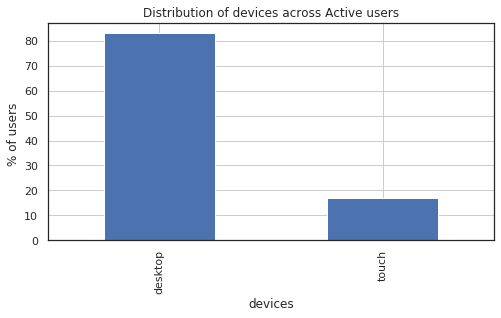

In [67]:
#Graphical visualization
ax = plt.subplots(figsize=(8,4))
percent.plot(kind='bar' )
plt.title('Distribution of devices across Active users') 
plt.ylabel('% of users ')
plt.xlabel('devices')
plt.grid()
plt.show();

There is a clear difference in users habit reagrding the usage of devices for purchasing.<br>
We might need to investigate further what issue affects the mobile version.<br>

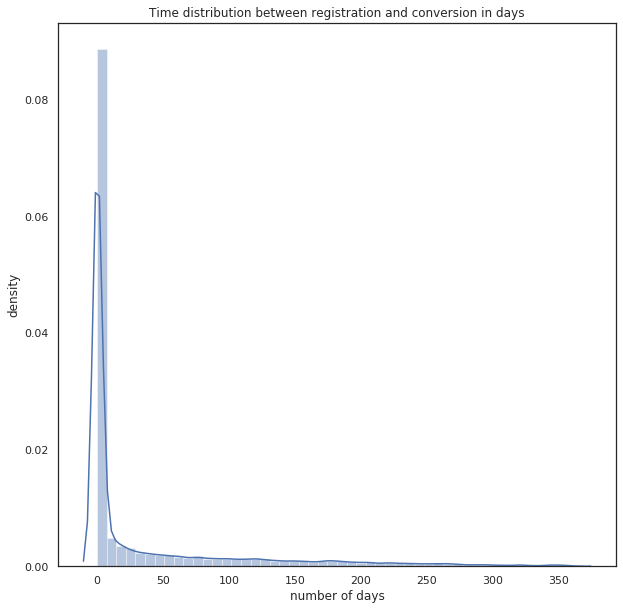

In [68]:
#graphical visualisation  of conversion 
ax = plt.subplots(figsize=(10,10))
sns.distplot(orders['conversion'])
plt.title('Time distribution between registration and conversion in days')
plt.ylabel('density')
plt.xlabel('number of days');

We have a huge proportion of purchases made on the same day of registration : DAY 0, the further we advance in days the less the user will be inclined to make a purchase.<br>
Now we want to look even deeper by knowing a more precised timeframe between registration and conversion , we need to think into maybe seconds.
 

In [69]:
visitors_first_sessions = visits.groupby('uid')['session_start'].min().reset_index()
 

buyers_first_orders = orders.groupby('uid')['order_date_x'].min().reset_index()
buyers_first_orders = visitors_first_sessions.merge(buyers_first_orders, on='uid')

In [70]:
buyers_first_orders['conversion'] = buyers_first_orders.order_date_x - buyers_first_orders.session_start
buyers_first_orders['conversion'] =buyers_first_orders['conversion'].dt.total_seconds() 

In [71]:
#dropping rows with values zero
buyers_first_orders = buyers_first_orders[buyers_first_orders.conversion != 0]

In [72]:
buyers_first_orders

,uid,session_start,order_date_x,conversion
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,9241320.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040.0
5,3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,1500.0
6,3605148382144603,2017-08-15 21:54:00,2017-09-21 20:56:00,3193320.0
...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,8278380.0
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,420.0
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,19998180.0
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,8933580.0


In [73]:
#finding the mode as we know already the distribution is skewed because of outliers
buyers_first_orders['conversion'].mode()

0    60.0
dtype: float64

One min to make a purchase seems to be quite fast, to get a real picture of the trend, we need to look a bit deeper.

In [74]:
#checking values counts in the  50 first rows to see if I can find trends 
buyers_first_orders['conversion'].count()

buyers_first_orders['conversion'].value_counts().head(50)

34068

60.0      2656
120.0     2098
180.0     1685
240.0     1460
300.0     1204
360.0     1077
420.0      970
480.0      793
540.0      742
600.0      596
660.0      531
720.0      529
780.0      438
840.0      392
900.0      361
960.0      347
1020.0     303
1140.0     279
1080.0     272
1200.0     246
1260.0     213
1320.0     187
1440.0     171
1380.0     161
1500.0     150
1560.0     135
1620.0     135
1680.0     122
1800.0     113
1740.0     106
2040.0      94
1860.0      92
1920.0      92
1980.0      88
2160.0      83
2220.0      79
2100.0      77
2460.0      71
2400.0      66
2280.0      63
2340.0      63
2580.0      61
2640.0      57
3000.0      54
2820.0      50
2700.0      50
2520.0      48
3060.0      46
3240.0      45
2940.0      44
Name: conversion, dtype: int64

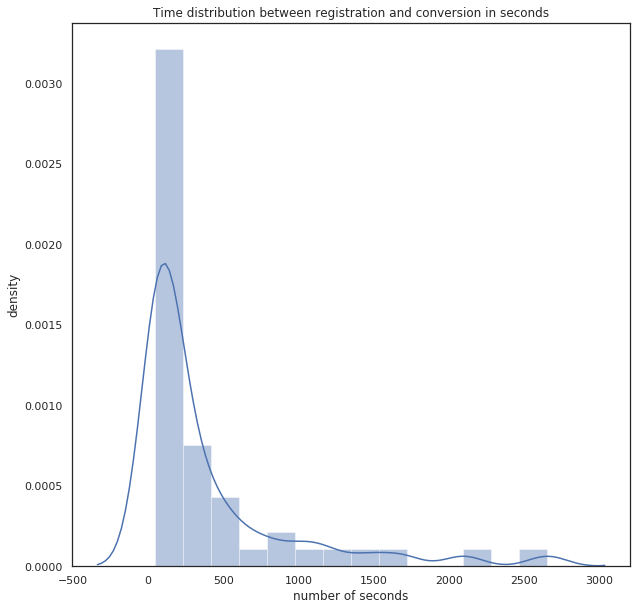

In [75]:
ax = plt.subplots(figsize=(10,10))
sns.distplot(buyers_first_orders['conversion'].value_counts().head(50))
plt.title('Time distribution between registration and conversion in seconds')
plt.ylabel('density')
plt.xlabel('number of seconds');


Purchases are made quite early,the longer we wait  the less we have users purchasing.

#### We have a clear picture of when people start buying after their first session and the distribution is not at all homogenous  across the lifetime.<br>
We can see that 52% of users make a purchase within the same day of their first session and there is a big drop after one day only with  2589 users which represents 5%  ,then 2% on the second day with 1027 users and 1.3% after 3 days with only 660 users.<br>
Those figures seem to match what we have seen earlier in the heatmap with a rapid and drastic drop in the number of buyers over the time.<br>
We tried to analyze a bit further and see if we can narrow down the timeframe in seconds,we took off the zero values and surprisely it seems that most of active users are making a purchase within 30 minutes and the proportion is decreasing rapidly also across the timespan. <br>
We can try to define 4 groups
* number 1 : <4 minutes
* number 2: <30 minutes 
* number 3:  >30 minutes <1 hour 
* number 4: 1 hour +<br>

Finally it seems that the most prefered devices by the users is by far the desktop by 83%, some improvements need to be implemented for the mobile version.<br>


#### <u>**How many orders do they make during a given period of time?**</u> 

We are going to see how many orders in average the users are making each month.

In [76]:
#number of order monthly
monthtly_orders= orders.groupby(['order_month']).agg({'uid': ['nunique']} ) 
monthtly_orders.index = pd.Series(monthtly_orders.index).dt.strftime('%Y-%m')
monthtly_orders

,uid
,nunique
order_month,
2017-06,2023
2017-07,1984
2017-08,1472
2017-09,2750
2017-10,4675
2017-11,4547
2017-12,4942
2018-01,3898


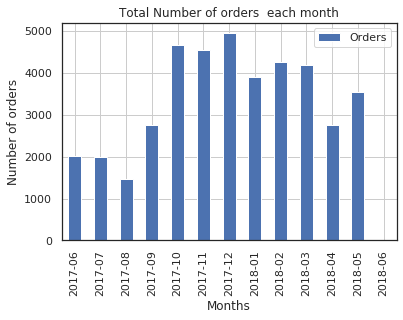

In [77]:
#
monthtly_orders.plot(kind="bar")
plt.title('Total Number of orders  each month') 
plt.ylabel('Number of orders')
plt.xlabel('Months')
plt.legend(["Orders"]);
plt.grid();



Oct / Nov / Dec are the peak months for orders 

In [78]:
 #number of order for each uid , it could be several orders per users
orders_per_users = orders.groupby(['order_month', 'uid']).agg({'order_day': 'nunique'}).reset_index()
orders_per_users

,order_month,uid,order_day
0,2017-06-01,1575281904278712,1
1,2017-06-01,16233238570251706,1
2,2017-06-01,29085576454138824,1
3,2017-06-01,31782048561502182,1
4,2017-06-01,50884319066603964,1
...,...,...,...
41014,2018-05-01,18417227789295707563,1
41015,2018-05-01,18418973552381796231,1
41016,2018-05-01,18419772037216346332,1
41017,2018-05-01,18428860277441438399,1


In [79]:
 #Regrouping all tables to get the mean for each month
monthtly_orders_per_user = orders_per_users.groupby('order_month').agg({'uid': 'nunique', 'order_day': 'mean'})

monthtly_orders_per_user
#average number of orders per month for each user rounded 
print('average number of orders per month for each user:',round(monthtly_orders_per_user.order_day.mean(),2))

,uid,order_day
order_month,,
2017-06-01,2023,1.081068
2017-07-01,1984,1.102823
2017-08-01,1472,1.131793
2017-09-01,2750,1.142182
2017-10-01,4675,1.131123
2017-11-01,4547,1.143171
2017-12-01,4942,1.153582
2018-01-01,3898,1.128271
2018-02-01,4258,1.142085


average number of orders per month for each user: 1.12


**We finally  managed to retreive the monthly number of orders for each user which is:**
* 1.12 order per  user

#### <u>**What is the average purchase size?**</u> 

To tackle this task we need to focus now on the average revenue generated by each user and also by each device channel.


In [80]:
#generate average revenue per user 
revenue_per_users = orders.groupby(['order_month']).agg({'revenue_per_order': 'mean','uid': 'nunique'}).rename(columns={'revenue_per_order':'avg_monthly_revenue', 'uid': 'nb of users'})
revenue_per_users
revenue_per_users.mean()

,avg_monthly_revenue,nb of users
order_month,,
2017-06-01,4.060106,2023
2017-07-01,5.306589,1984
2017-08-01,4.847139,1472
2017-09-01,5.416448,2750
2017-10-01,4.928280,4675
2017-11-01,4.783518,4547
2017-12-01,5.852139,4942
2018-01-01,4.112927,3898
2018-02-01,4.840095,4258


avg_monthly_revenue       4.838700
nb of users            3155.307692
dtype: float64

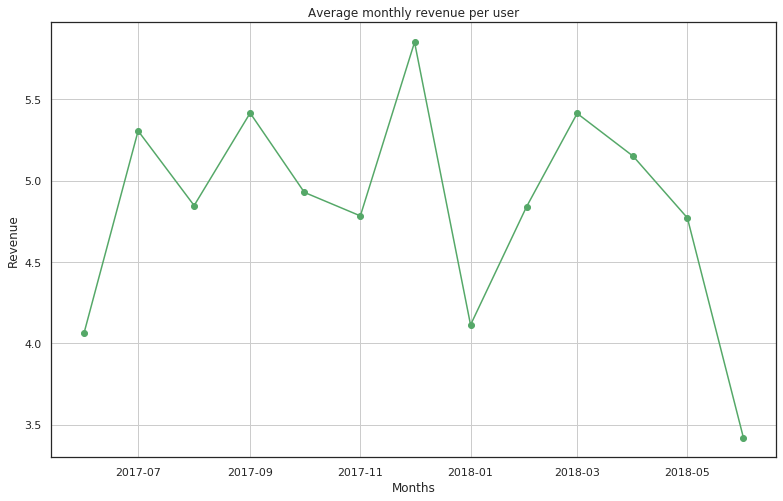

In [81]:
ax = plt.subplots(figsize=(13,8))
plt.plot(revenue_per_users['avg_monthly_revenue'],'-og')
plt.title('Average monthly revenue per user') 
plt.ylabel('Revenue')
plt.xlabel('Months')
plt.grid()

plt.show();

The average montly purchase by user is 4.83 the most profitable month is december with an average of 5.85 and the least is june 2018 with 3.42.<br>
It confirms the trend we saw earlier that the most profitable months are in winter time.<br>
Let's have a look on the device type.

In [82]:
revenue_device= orders.groupby(['device']).agg({'revenue_per_order': 'mean'})
display(round(revenue_device, 2))




,revenue_per_order
device,
desktop,5.16
touch,4.29


The desktop version generates 20.2% more revenue per order than the mobile version.


#### <u>**How much money do they bring?(LTV)**</u> 

LTV (lifetime value) is the customer's «lifetime» value. <br>
It's the total amount of money the user brings to the company on average by making purchases. <br> 
We will consider the gross profit from a user per period.<br>
We will shape the cohorts and  merge them then calculate the LTV and finally we will visualize the results.<br>

In [83]:
orders.head(5)

,order_date_x,revenue_per_order,uid,order_day,order_week,order_month,order_year,date_first_session,month_first_session,week_first_session,session_year,month_first_order,conversion,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop


In [84]:
# Shaping Cohorts 

cohorts = (
    orders.groupby(['month_first_order', 'order_month'])
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue'})
    .reset_index()
)

# Shaping cohorts sizes
cohort_sizes = (
    orders.groupby('month_first_order')
    .agg({'uid': 'nunique'})
    .rename(columns={'uid':'nb_cohorts_users'})
    .reset_index()
)

In [85]:
cohorts

,month_first_order,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [86]:
cohort_sizes

,month_first_order,nb_cohorts_users
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [87]:
#merging both tables 
monthly_revenue_cohort = pd.merge(cohort_sizes, cohorts, on='month_first_order')
monthly_revenue_cohort.sample(10)                                                       

,month_first_order,nb_cohorts_users,order_month,revenue
20,2017-07-01,1923,2018-03-01,310.05
1,2017-06-01,2023,2017-07-01,981.82
64,2018-01-01,3373,2018-02-01,994.22
45,2017-10-01,4340,2018-01-01,682.01
11,2017-06-01,2023,2018-05-01,519.62
26,2017-08-01,1370,2017-11-01,536.05
46,2017-10-01,4340,2018-02-01,657.77
62,2017-12-01,4383,2018-05-01,1481.66
49,2017-10-01,4340,2018-05-01,501.14
58,2017-12-01,4383,2018-01-01,1141.22


In [88]:
#Calculation LTV

#creation of LTV revenue 
monthly_revenue_cohort['LTV'] = monthly_revenue_cohort['revenue'] / monthly_revenue_cohort['nb_cohorts_users']

#creation of LTV lifetime in months
monthly_revenue_cohort['lifetime'] = (
    monthly_revenue_cohort['order_month'] - monthly_revenue_cohort['month_first_order']
) / np.timedelta64(1, 'M')

#rounding monthly_revenue_cohort['lifetime']
monthly_revenue_cohort['lifetime'] = monthly_revenue_cohort['lifetime'].round().astype('int')

 
monthly_revenue_cohort.sample(10)

,month_first_order,nb_cohorts_users,order_month,revenue,LTV,lifetime
32,2017-08-01,1370,2018-05-01,257.53,0.187978,9
73,2018-03-01,3533,2018-04-01,1063.05,0.300892,1
39,2017-09-01,2581,2018-03-01,1810.85,0.701608,6
72,2018-03-01,3533,2018-03-01,17095.49,4.838803,0
4,2017-06-01,2023,2017-10-01,2068.58,1.022531,4
19,2017-07-01,1923,2018-02-01,272.72,0.141820,7
20,2017-07-01,1923,2018-03-01,310.05,0.161232,8
38,2017-09-01,2581,2018-02-01,1670.08,0.647067,5
13,2017-07-01,1923,2017-08-01,644.61,0.335211,1
43,2017-10-01,4340,2017-11-01,2325.21,0.535763,1


In [89]:
#creation pivot table for LTV  
result_LTV = monthly_revenue_cohort.pivot_table(
    index='month_first_order', columns='lifetime', values='LTV', aggfunc='mean'
)
result_LTV = result_LTV.cumsum(axis=1)
#changing format of date 
result_LTV.index = pd.Series(result_LTV.index).dt.strftime('%Y-%m')
#
result_LTV.fillna('')
 

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,
2017-06,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02,4.156987,4.43526,4.51378,4.58792,,,,,,,,


In [90]:
#Finding average LTV for 6 months
result_LTV_6 = result_LTV.cumsum(axis=1).mean(axis=0)[5]

print('Average LTV for 6 months from the first order:', round(result_LTV_6,2))

Average LTV for 6 months from the first order: 40.03


For marketing investments to pay off, one customer acquisition should not cost more than 40.03

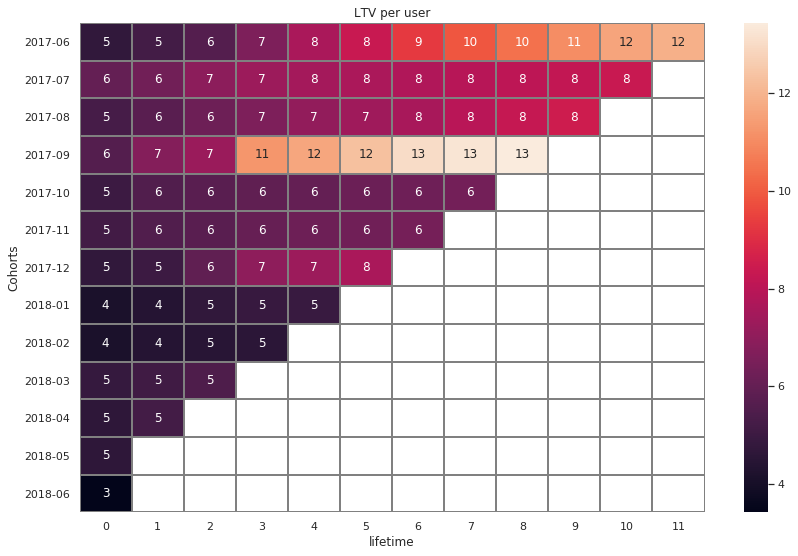

In [91]:
#heatmap vizualisation for LTV 

sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('LTV per user')

sns.heatmap(
    result_LTV, annot=True, fmt='.0f', linewidths=1, linecolor='gray' 
) 
plt.ylabel('Cohorts');

<u>**LTV Analyis**</u> 

We can observe that the first cohort has some good results compared to the rest with a growing LTV rate across the lifetime. <br>

The only other cohort with good results is the one from 09/2017 with a LTV rate growing from 4rd to 9th months.It could have been the introduction of a feature or external event at that particular period.<br>

For the remaining cohorts  the results are simply not there,they are far behind the two other cohorts cited previously.<br>

Few options we can explote to improve the LTV are :
* Expand the variety of products to retain users <br>
* Simplify the process with the possibility to sign in from social media accounts : FB, Gmail,Twitter.It will reduce the time for onboarding with email etc..<br>
* Use wisely pushed notifications to inform users about new features and encourage nicely them to make purchases<br>


 

#### <u>**Revenue analysis per channel device**</u> 

In [92]:
#grouping data
revenue_devices=orders.groupby(['order_month', 'device'])['revenue_per_order'].sum().to_frame()
display(revenue_devices)

revenue_per_order
order_month device                    
2017-06-01  desktop            8321.37
            touch              1236.12
2017-07-01  desktop           10251.79
            touch              2287.68
2017-08-01  desktop            7258.59
            touch              1500.19
2017-09-01  desktop           15631.37
            touch              2714.14
2017-10-01  desktop           23094.75
            touch              4892.95
2017-11-01  desktop           21693.31
            touch              5376.62
2017-12-01  desktop           32105.87
            touch              4282.73
2018-01-01  desktop           16344.38
            touch              3072.75
2018-02-01  desktop           21632.63
            touch              3927.91
2018-03-01  desktop           23295.06
            touch              5539.53
2018-04-01  desktop           14044.53
            touch              2813.53
2018-05-01  desktop           17652.70
            touch              3083.28
2018-06-01  desktop               3.42
            touch                  NaN

In [93]:
#replace nan by 0
revenue_devices.fillna(0)

revenue_per_order
order_month device                    
2017-06-01  desktop            8321.37
            touch              1236.12
2017-07-01  desktop           10251.79
            touch              2287.68
2017-08-01  desktop            7258.59
            touch              1500.19
2017-09-01  desktop           15631.37
            touch              2714.14
2017-10-01  desktop           23094.75
            touch              4892.95
2017-11-01  desktop           21693.31
            touch              5376.62
2017-12-01  desktop           32105.87
            touch              4282.73
2018-01-01  desktop           16344.38
            touch              3072.75
2018-02-01  desktop           21632.63
            touch              3927.91
2018-03-01  desktop           23295.06
            touch              5539.53
2018-04-01  desktop           14044.53
            touch              2813.53
2018-05-01  desktop           17652.70
            touch              3083.28
2018-06-01  desktop               3.42
            touch                 0.00

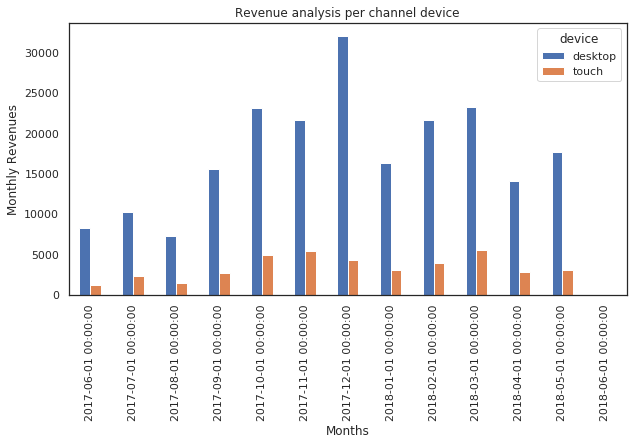

In [94]:
#creation bar chart 
pt= revenue_devices.pivot_table(index='order_month',columns='device',values='revenue_per_order',aggfunc={"revenue_per_order": np.sum}) 
pt.plot(kind='bar',figsize=(10,5))

plt.title('Revenue analysis per channel device')
plt.xlabel('Months')
plt.ylabel('Monthly Revenues');

We can clearly see the massive difference between the 2 two channels.
Some urgent improvements need to be implemented into the mobile version to reverse the trend.

## <u>**Conclusion**</u> 
 
In this section the sales analysis revealed that people purchase mostly on the same day they visit the platform and it takes place mostly within the first 7 minutes to an hour.<br>
After that timeframe the number of purchasers drops drastically.<br>

82% of the buyers use the desktop version which obviously generates way more revenues overall.<br>
Some urgent improvements need to be implemented into the mobile version to reverse the trend.<br>

Through some calculation we found that the average number of orders per month for each user is 	1.12 order per user and the average monthly revenue generated by the users is 4.83 with a peak in winter times around 5.85.<br>
It seems that the plaform generates more revenues in Winter than during Summer.<br>

The average Average LTV for 6 months from the first order is around 40 which implies that for marketing investments to pay off, one customer acquisition should not cost more than 40. <br>
If we look closer on the LTV we can clearly observe that the first cohort  of June 2017 is leading with a consistent growing LTV rate across the lifetime.<br>
Only the cohort of September 2017 shows some signs of growth as well , for the rest the figures are alarming as they are lagging way behind.<br>


 

### <u>**Marketing**</u> 


* How much money was spent? Overall/per source/over time <br>
* How much did customer acquisition from each of the sources cost?<br>
* How worthwhile were the investments? (ROI)<br>


In [95]:
costs

,source_id,date,cost_per_day,month_cost,year_cost
0,1,2017-06-01,75.20,6,2017
1,1,2017-06-02,62.25,6,2017
2,1,2017-06-03,36.53,6,2017
3,1,2017-06-04,55.00,6,2017
4,1,2017-06-05,57.08,6,2017
...,...,...,...,...,...
2537,10,2018-05-27,9.92,5,2018
2538,10,2018-05-28,21.26,5,2018
2539,10,2018-05-29,11.32,5,2018
2540,10,2018-05-30,33.15,5,2018


#### <u>**Total Cost**</u> 

In [96]:
#Calculation total_cost 
total_cost=costs['cost_per_day'].sum().round()
print('The Total cost is:',total_cost)

The Total cost is: 329132.0


#### <u>**Total Cost per source**</u> 

In [97]:
#Calculation total_cost per source
total_cost_source=costs.groupby(['source_id'])['cost_per_day'].sum().to_frame().sort_values(by='cost_per_day',ascending=False)
total_cost_source['cost_per_day_pct']=(total_cost_source['cost_per_day'] /total_cost_source['cost_per_day'].sum()*100).round()
total_cost_source

,cost_per_day,cost_per_day_pct
source_id,,
3,141321.63,43.0
4,61073.60,19.0
5,51757.10,16.0
2,42806.04,13.0
1,20833.27,6.0
10,5822.49,2.0
9,5517.49,2.0


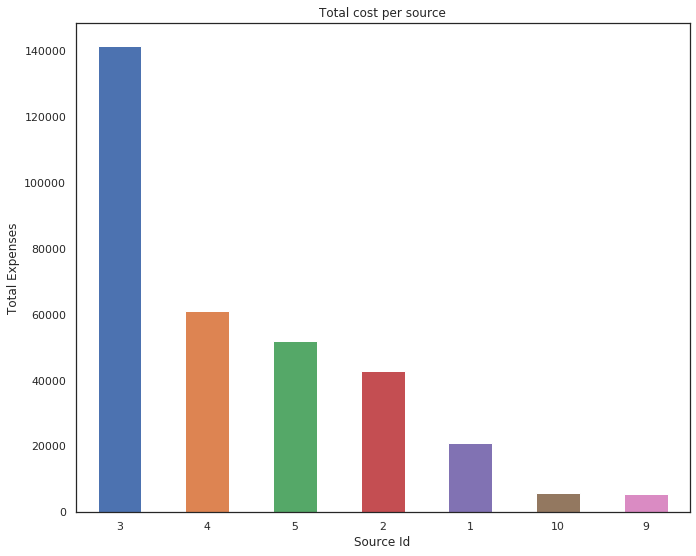

In [98]:
#Visualization Total Cost per source :bar chart
total_cost_source['cost_per_day'] .plot(kind='bar',figsize=(11,9),color=['C0', 'C1','C2','C3','C4','C5','C6'])
plt.xticks(rotation=1)
plt.title('Total cost per source')
plt.xlabel('Source Id')
plt.ylabel('Total Expenses');


We can see that the source 3 is the one costing the most representing 43% of the total expenses , followed by source 4 and 5.<br>
At the bottom source 10 and 9 are only representing 2% for each.<br>
We notice that source 6-7-8 are missing it could be that they are not used at all, therefore we won't include them in the calculation.<br>

#### <u>**Total Cost over time**</u> 

We are going to calculate the total cost over the months and years.

##### <u>**Total Cost over months**</u> 

In [99]:
costs['month_cost'] = costs['date'].dt.strftime('%Y-%m')

total_costs_month=costs.groupby(['month_cost','source_id'])['cost_per_day'].sum().to_frame().rename(columns={'cost_per_day':'monthly_cost'}).reset_index()
total_costs_month
print('The average monthly cost per source is ',total_costs_month.monthly_cost.mean().round())

,month_cost,source_id,monthly_cost
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
...,...,...,...
79,2018-05,3,9411.42
80,2018-05,4,4214.21
81,2018-05,5,3669.56
82,2018-05,9,362.17


The average monthly cost per source is  3918.0


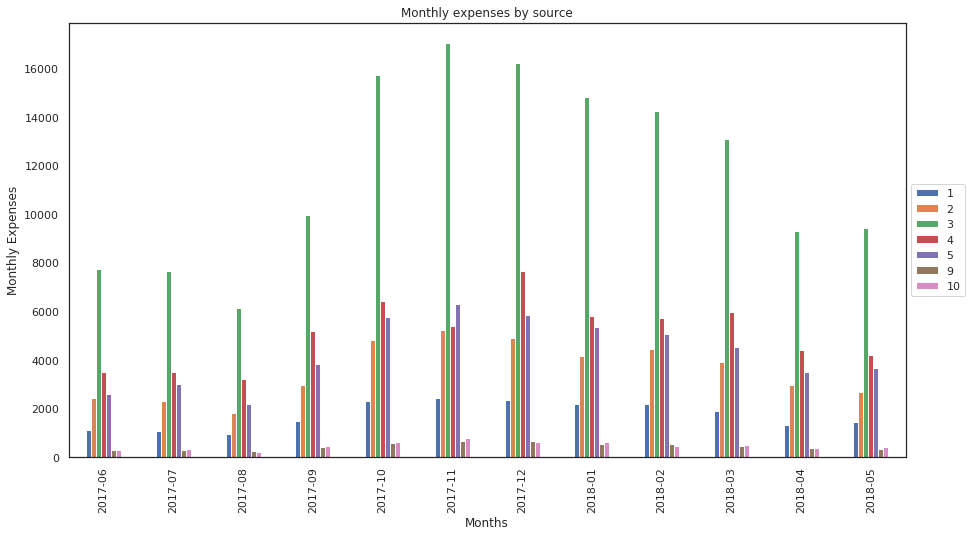

In [100]:
p=total_costs_month.pivot_table(index='month_cost', 
                                     columns='source_id',
                                     values='monthly_cost',
                                     aggfunc='sum')
p.plot(kind='bar',figsize=(15,8))
plt.title('Monthly expenses by source')
plt.xlabel('Months')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Monthly Expenses');

October, November and December 2017 are the most costly months and source 3 is by far the most costly source as well. 

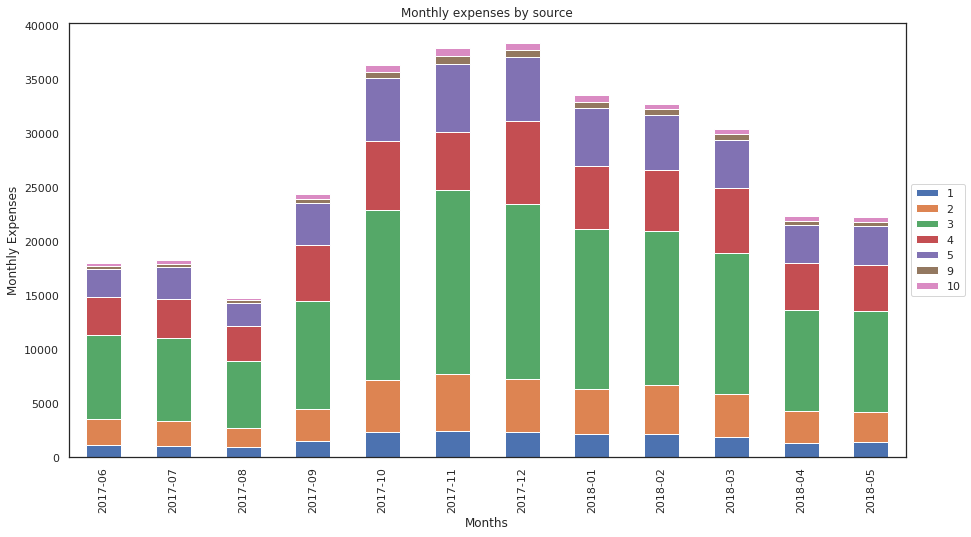

In [101]:
p=total_costs_month.pivot_table(index='month_cost', 
                                     columns='source_id',
                                     values='monthly_cost',
                                aggfunc='sum')


p.plot(kind='bar',stacked=True,figsize=(15,8))
plt.title('Monthly expenses by source')
plt.xlabel('Months')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Monthly Expenses');


 

Through this graph we can notice that the expenses during summer are the lowest, then  comes an increase in winter followed a progressive decrease in spring.

##### <u>**Total Cost over years**</u> 

In [102]:
#total_costs_year per source calculation

total_costs_year=costs.groupby(['year_cost','source_id'])['cost_per_day'].sum().to_frame().rename(columns={'cost_per_day':'yearly_cost'}).reset_index()
total_costs_year
print('The average yearly cost per source is ',total_costs_year.yearly_cost.mean().round())

,year_cost,source_id,yearly_cost
0,2017,1,11754.42
1,2017,2,24547.68
2,2017,3,80495.21
3,2017,4,34944.28
4,2017,5,29613.94
5,2017,9,3202.88
6,2017,10,3402.74
7,2018,1,9078.85
8,2018,2,18258.36
9,2018,3,60826.42


The average yearly cost per source is  23509.0


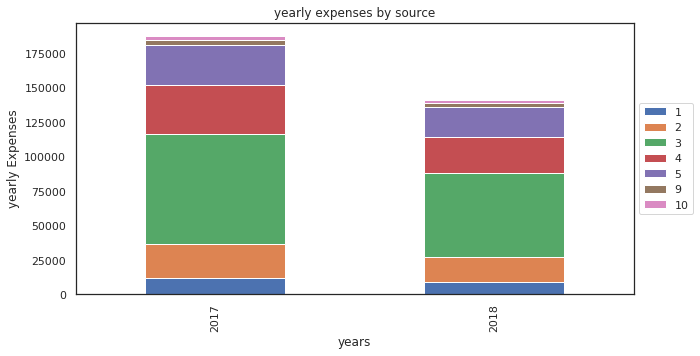

In [103]:
#total_costs_year per source stacked bar chart 
p=total_costs_year.pivot_table(index='year_cost', 
                                     columns='source_id',
                                     values='yearly_cost',
                                     aggfunc='sum')
p.plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('yearly expenses by source')
plt.xlabel('years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('yearly Expenses');



The expenses per source remained in same proportion in both years, but we observed that the expenses overall are decreasing.

#### <u>**How much did customer acquisition from each of the sources cost?**</u> 

CAC (customer acquisition cost) is the cost of attracting a customer:the money a new customer costs a company. <br>
To get our customer acquisition cost (CAC), we will divide all marketing costs by the number of users acquired over a given time period. <br>
CAC is an important metric  to determine profitability and efficiency. <br>

In [104]:
# Shaping Cohorts 
# let's retrieve the month of each customer's first purchase
first_orders_2 = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_2.columns = ['uid', 'first_order_month']
first_orders_2.head() 


,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [105]:
#identify  the source of each user: it takes time here to deploy the code

sources_users = (visits
                .sort_values(by='session_date')
                .groupby('uid', as_index=False)
                .agg({'source_id': 'first'}))

sources_users.head(20)

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
5,397399764396656,4
6,407573351275847,2
7,498809019029702,4
8,526778907996220,2
9,577434573913691,9


In [106]:
#1st Merge 
users_orders_info = first_orders_2.merge(sources_users, on='uid', how='left')
users_orders_info

,uid,first_order_month,source_id
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5
...,...,...,...
36518,18445147675727495770,2017-11-01,5
36519,18445407535914413204,2017-09-01,3
36520,18445601152732270159,2018-03-01,2
36521,18446156210226471712,2018-02-01,3


In [107]:
#We'll calculate the number of new customers (n_buyers) for each month:
cohort_sizes_3 =(users_orders_info
                                .groupby(['first_order_month', 'source_id'], as_index=False)
                                .agg({'uid': 'nunique'})
                                .rename(columns={'uid': 'n_users'}))
cohort_sizes_3.head() 



,first_order_month,source_id,n_users
0,2017-06-01,1,213
1,2017-06-01,2,241
2,2017-06-01,3,616
3,2017-06-01,4,405
4,2017-06-01,5,389


In [108]:
#retreive cost by month for each source 
total_costs_month2=costs.groupby(['month_cost','source_id'])['cost_per_day'].sum().to_frame().rename(columns={'cost_per_day':'monthly_cost'}).reset_index()
total_costs_month2.head()

,month_cost,source_id,monthly_cost
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12


In [109]:
#Second merge sources_users +total_costs_month2
monthly_orders_sources= cohort_sizes_3.merge(total_costs_month2,on=['source_id'])
monthly_orders_sources.sample(10)
monthly_orders_sources.isnull().sum()

,first_order_month,source_id,n_users,month_cost,monthly_cost
59,2017-10-01,1,407,2018-05,1467.61
412,2018-04-01,3,597,2017-10,15737.24
316,2017-08-01,3,329,2017-10,15737.24
482,2017-10-01,4,1130,2017-08,3217.36
670,2017-12-01,5,773,2018-04,3501.15
413,2018-04-01,3,597,2017-11,17025.34
716,2018-04-01,5,458,2018-02,5071.31
456,2017-08-01,4,327,2017-06,3514.80
333,2017-09-01,3,753,2018-03,13080.85
1017,2018-05-01,10,127,2018-03,526.41


first_order_month    0
source_id            0
n_users              0
month_cost           0
monthly_cost         0
dtype: int64

In [110]:
#Calculation CAC

monthly_orders_sources['cac'] = monthly_orders_sources.monthly_cost / monthly_orders_sources.n_users

In [111]:
monthly_orders_sources.sample(15)

,first_order_month,source_id,n_users,month_cost,monthly_cost,cac
162,2017-07-01,2,212,2017-12,4897.80,23.102830
935,2017-10-01,10,202,2018-05,409.86,2.029010
576,2018-06-01,4,1,2017-06,3514.80,3514.800000
147,2017-06-01,2,241,2017-09,2985.66,12.388631
790,2017-10-01,9,121,2018-04,373.49,3.086694
920,2017-09-01,10,82,2018-02,480.88,5.864390
582,2018-06-01,4,1,2017-12,7680.47,7680.470000
416,2018-04-01,3,597,2018-02,14228.56,23.833434
914,2017-09-01,10,82,2017-08,232.57,2.836220
701,2018-03-01,5,575,2017-11,6325.34,11.000591


In [112]:

pd.set_option('precision', 2)
report_final_table = monthly_orders_sources.pivot_table(index='month_cost',
                                                        columns='source_id',
                                                        values='cac',
                                                        aggfunc='mean')
report_final_table

source_id,1,2,3,4,5,9,10
month_cost,,,,,,,
2017-06,4.46,9.25,10.62,275.08,4.79,3.84,3.57
2017-07,4.25,8.89,10.54,276.25,5.49,4.07,3.74
2017-08,3.77,6.90,8.44,251.81,4.00,3.35,2.64
2017-09,5.95,11.38,13.68,406.37,7.04,5.59,5.23
2017-10,9.17,18.46,21.61,502.52,10.55,8.20,7.12
2017-11,9.69,19.99,23.38,421.75,11.58,9.20,8.99
2017-12,9.27,18.66,22.28,601.11,10.75,8.86,7.33
2018-01,8.66,15.84,20.34,456.50,9.83,7.36,6.97
2018-02,8.73,17.05,19.54,447.04,9.28,7.42,5.46


source_id
1       6.877747
2      13.591214
3      16.173768
4     398.325077
5       7.892863
9       6.188574
10      5.506592
Name: cac, dtype: float64

monthly  average  CAC per source : 65.0


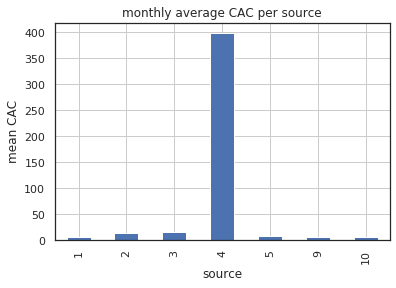

In [113]:
#Calculation mean CAC per source 
pd.reset_option('precision')

mean =monthly_orders_sources.groupby('source_id')['cac'].mean()

display(mean)
print('monthly  average  CAC per source :',mean.mean().round())
mean.plot(kind='bar')
plt.title('monthly average CAC per source')
plt.ylabel('mean CAC')
plt.xlabel('source')
plt.grid();




The  source 4 seems to be the one with the highest montly average CAC :398 far ahead from the remaining sources.<br>
The monthly  average  CAC per source is 65.0.



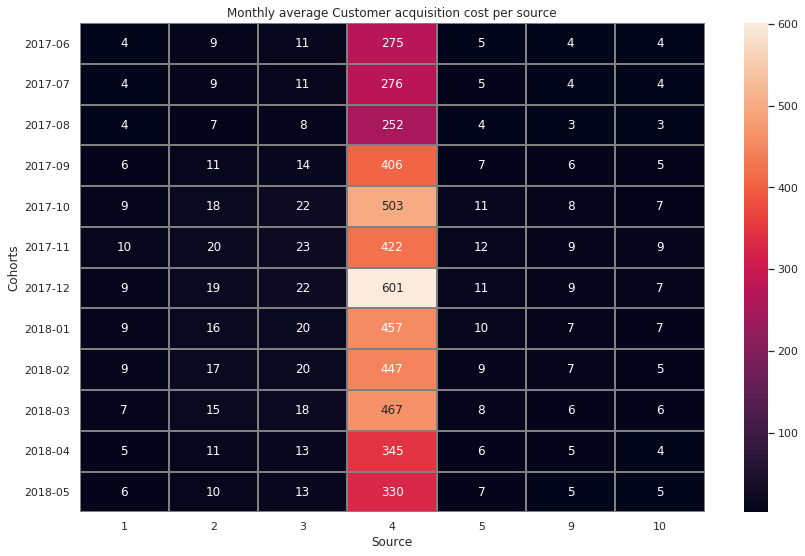

In [114]:
#heatmap mean CAC per source 
sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Monthly average Customer acquisition cost per source')

sns.heatmap(
    report_final_table, annot=True, fmt='.0f', linewidths=1, linecolor='gray'  
) 
plt.ylabel('Cohorts')
plt.xlabel('Source');

The average CAC is fairly low for the other sources which means we need to focus on decreasing the CAC for the source 4 so we can spread the cost on the others.<br>
Because of such difference we are in position to spend more on the others sources  for example sources 1,2,9,10 to get more revenues in return.<br>

#### <u>**How worthwhile were the investments? (ROI)?**</u> 

##### <u>**ROMI**</u> 

In our case we will try to find the ROMI (return on marketing investment) by dividing LTV by CAC.


In [115]:
cac_monthly =monthly_orders_sources.groupby('month_cost').agg({'cac' : 'mean'})
cac_monthly 

,cac
month_cost,
2017-06,47.227286
2017-07,47.471293
2017-08,42.619245
2017-09,69.050801
2017-10,87.462128
2017-11,76.196568
2017-12,102.825172
2018-01,79.559872
2018-02,77.898428


In [116]:
#Romi calculation 
#we found earlier Average LTV for 6 months from the first order: 904.0
#monthly cac mean for 6 months as we did previously for the average LTV
cac_monthly2 = cac_monthly[:-5]
display(cac_monthly2)
#calculation CAC mean for 6 months 
print (round(cac_monthly2.mean(),2) )



,cac
month_cost,
2017-06,47.227286
2017-07,47.471293
2017-08,42.619245
2017-09,69.050801
2017-10,87.462128
2017-11,76.196568
2017-12,102.825172


cac    67.55
dtype: float64


In [117]:
LTV= 40.03
CAC = 67.55
ROMI = LTV / CAC
print('ROMI:',round(ROMI,2))

ROMI: 0.59


In [118]:
#check gross profit 
gp= (orders.revenue_per_order.sum() ) - (costs.cost_per_day.sum())
print('Gross profit:',round(gp,2))

Gross profit: -77074.42


In healthy per-customer economics, LTV is greater than CAC which is not the case at the moment.<br>
Also the ROMI is not yet there.<br>
The gross profit is in negative as well.<br>

##### <u>**LTV per source**</u> 

In [119]:
#regroup orders and source_id

orders_n_sources = orders.merge(sources_users, how='left', on='uid')
orders_n_sources 

,order_date_x,revenue_per_order,uid,order_day,order_week,order_month,order_year,date_first_session,month_first_session,week_first_session,session_year,month_first_order,conversion,device,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01,0,desktop,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2018-05-31,2018-05-01,2018-05-31,2018-01-01,2018-05-01,0,touch,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2018-05-31,2018-05-01,2018-05-31,2018-01-01,2018-05-01,0,desktop,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2018-05-31,2018-05-01,2018-05-31,2018-01-01,2018-05-01,0,desktop,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-01-01,2017-10-23,2017-10-01,2017-10-19,2017-01-01,2018-05-01,220,desktop,3


In [120]:
#creation cohort sources
cohort_sources = (orders_n_sources
                       .groupby('source_id', as_index=False)
                       .agg({'uid':'nunique'}))
cohort_sources

,source_id,uid
0,1,3365
1,2,3556
2,3,10137
3,4,9999
4,5,7109
5,6,0
6,7,1
7,9,1054
8,10,1302


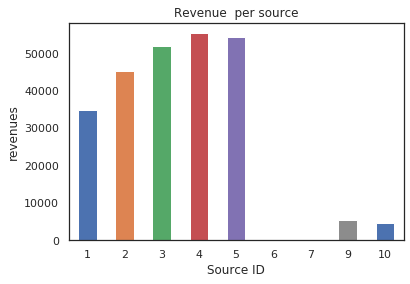

In [121]:
#extract total revenue 
montly_orders_sources = (
    orders_n_sources
    .groupby(['source_id'])
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue_per_source'})
    .reset_index()
)
montly_orders_sources


montly_orders_sources.set_index('source_id').revenue_per_source.plot(kind='bar',color=['C0', 'C1','C2','C3','C4','C5','C6','C7'])
plt.title ('Revenue  per source')
plt.ylabel ('revenues')
plt.xlabel ('Source ID')
plt.xticks (rotation = 0);

Sources 3, 4 and 5 are the most profitable , 9 and 10 are lagging behind.

In [122]:
#extract average revenue per user by merging montly_orders_sources+ cohort_sources

montly_orders_sources = (montly_orders_sources
                            .merge(cohort_sources, on='source_id', how='left')
                            .rename(columns={'uid': 'nb_users'}))
montly_orders_sources

,source_id,revenue_per_source,nb_users
0,1,34797.27,3365
1,2,45335.95,3556
2,3,51958.06,10137
3,4,55387.40,9999
4,5,54442.14,7109
5,6,0.00,0
6,7,1.22,1
7,9,5538.50,1054
8,10,4596.66,1302


In [123]:
# Calculation LTV in a new column
montly_orders_sources['LTV'] = montly_orders_sources.revenue_per_source /montly_orders_sources.nb_users
montly_orders_sources.sort_values(by='LTV', ascending=False, inplace=True)
montly_orders_sources 


,source_id,revenue_per_source,nb_users,LTV
1,2,45335.95,3556,12.749142
0,1,34797.27,3365,10.340942
4,5,54442.14,7109,7.658199
3,4,55387.40,9999,5.539294
7,9,5538.50,1054,5.254744
2,3,51958.06,10137,5.125585
8,10,4596.66,1302,3.530461
6,7,1.22,1,1.220000
5,6,0.00,0,NaN


In [124]:
#calculation mean LTV
print('monthly average LTV per source',round(montly_orders_sources['LTV'].mean(),2))

monthly average LTV per source 6.43


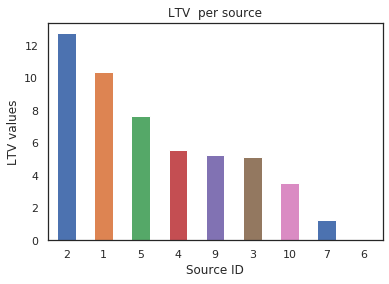

In [125]:
# visualisation LTV per source
montly_orders_sources.set_index('source_id').LTV.plot(kind='bar',color=['C0', 'C1','C2','C3','C4','C5','C6'])
 
plt.title ('LTV  per source')
plt.ylabel ('LTV values')
plt.xlabel ('Source ID')
plt.xticks (rotation = 0);

We observe that the source 2 and 1 are  the most profitable in term of LTV followed by source 5, at the bottom we have sources 10 and 7 .

##### <u>**CAC per source**</u> 

In [126]:
# Grouping cost per sources 
costs_source_id = (
    costs
    .groupby('source_id', as_index=False)
    .agg({'cost_per_day': 'sum'})
    .rename(columns={'cost_per_day': 'cost_per_source'})
)
costs_source_id

,source_id,cost_per_source
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [127]:
#
sources_cac = (
    costs_source_id
    .merge(cohort_sources, on='source_id')
    .rename(columns={'uid':'nb_users'}))
sources_cac 

,source_id,cost_per_source,nb_users
0,1,20833.27,3365
1,2,42806.04,3556
2,3,141321.63,10137
3,4,61073.60,9999
4,5,51757.10,7109
5,9,5517.49,1054
6,10,5822.49,1302


In [128]:
#calculation CAC per source 
sources_cac['CAC'] = sources_cac.cost_per_source / sources_cac.nb_users
#cac_sources = cac_sources.loc[:,['id_source', 'cac']]
sources_cac.sort_values(by='CAC', ascending=False, inplace=True)
sources_cac

,source_id,cost_per_source,nb_users,CAC
2,3,141321.63,10137,13.941169
1,2,42806.04,3556,12.037694
4,5,51757.10,7109,7.280504
0,1,20833.27,3365,6.191165
3,4,61073.60,9999,6.107971
5,9,5517.49,1054,5.234810
6,10,5822.49,1302,4.471959


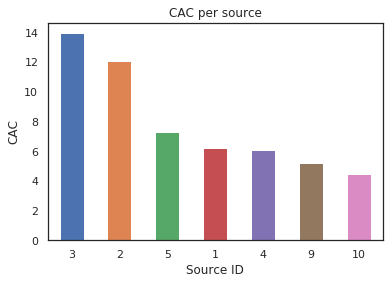

In [129]:
sources_cac.set_index('source_id').CAC.plot(kind='bar',color=['C0', 'C1','C2','C3','C4','C5','C6'])
plt.title('CAC per source')
plt.ylabel('CAC')
plt.xlabel('Source ID')
plt.xticks (rotation = 0)
plt.show();

It seems that the source 3 has the highest CAC, followed by source 2 and 5.<br>
Source 4 seems to have a good Ration with low CAC and high revenues<br>


##### <u>**ROMI per source**</u> 

In [130]:
#set 2 decimals 
pd.set_option('precision', 2)
#merging tables montly_orders_sources + sources_cac
romi_per_sources = (
    montly_orders_sources[['source_id', 'LTV']].merge(sources_cac, on='source_id')
    .set_index('source_id')
)
#CALCULATION ROMI
romi_per_sources['ROMI'] = romi_per_sources.LTV / romi_per_sources.CAC
#ordering clumn ROMI
romi_per_sources.sort_values(by='ROMI', ascending=False, inplace=True)
romi_per_sources


,LTV,cost_per_source,nb_users,CAC,ROMI
source_id,,,,,
1,10.34,20833.27,3365,6.19,1.67
2,12.75,42806.04,3556,12.04,1.06
5,7.66,51757.10,7109,7.28,1.05
9,5.25,5517.49,1054,5.23,1.00
4,5.54,61073.60,9999,6.11,0.91
10,3.53,5822.49,1302,4.47,0.79
3,5.13,141321.63,10137,13.94,0.37


In [1]:
#set back decimal to normal 
pd.reset_option('precision')
#visualisation ROMI per source 
romi_per_sources.ROMI.plot(kind='bar',color=['C0', 'C1','C2','C3','C4','C5','C6'])
plt.title('ROMI per source')
plt.ylabel('CAC')
plt.xlabel('Source ID')
plt.xticks (rotation = 0)
plt.show();


NameError: name 'pd' is not defined

The source 1 has the best ROMI followed by source 2 and 5, source 3 is facing big difficulties with :
* low ROMI
* highest number of users
* highest CAC
* highest cost per source
* lowest LTV 

##### <u>**LTV per device type**</u> 

In [132]:
#find proportion of revenue per device type 
revenue_dev = (
    orders
    .groupby('device')
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue_per_device'})
     
)
display(round(revenue_dev))
revenue_dev =round(revenue_dev)

,revenue_per_device
device,
desktop,211330.0
touch,40727.0


The desktop version generates more revenue than the mobile one.

In [133]:
#Link uid to device type 

users_device = (
    orders
    .sort_values(by='order_day', ascending=True)
    .groupby('uid', as_index= False)
    .agg({'device': 'first'})
)
users_device

,uid,device
0,313578113262317,desktop
1,1575281904278712,touch
2,2429014661409475,desktop
3,2464366381792757,desktop
4,2551852515556206,desktop
...,...,...
36518,18445147675727495770,touch
36519,18445407535914413204,desktop
36520,18445601152732270159,desktop
36521,18446156210226471712,desktop


,device,nb_users
0,desktop,29211
1,touch,7312


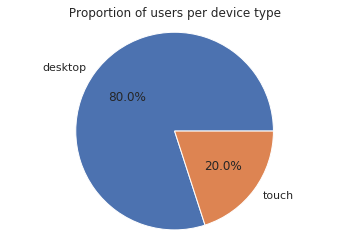

In [134]:
#Find proportion of users per device type 
count_users_device= (
    users_device
    .groupby('device', as_index=False)
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'nb_users'})
)
 
display (count_users_device)


my_data = [29211,7312]
my_labels = 'desktop','touch'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title(' Proportion of users per device type ')
plt.axis('equal')
plt.show();

The desktop version is predominant among the users of the platform.

,device,revenue_per_device,nb_users
0,desktop,211330.0,29211
1,touch,40727.0,7312


,device,revenue_per_device,nb_users,LTV
0,desktop,211330.0,29211,7.0
1,touch,40727.0,7312,6.0


Average mean LTV per device type : 6.5


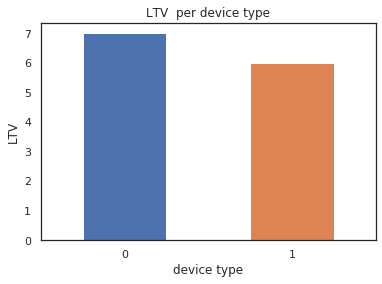

In [135]:
#Calculation LTV per device type: we need to merge  revenue_dev + count_users_device on 'device'
#to get revenue and nb of users 

device_metrics = (
    revenue_dev
    .merge(count_users_device, on='device')
)
display(device_metrics)
#ratio calculation LTV per device type

device_metrics['LTV'] = round(device_metrics.revenue_per_device /device_metrics.nb_users)
display(device_metrics)

# calculation  mean LTV  per device type
print('Average mean LTV per device type :',device_metrics['LTV'].mean())

#visualisation LTV per device type
device_metrics.LTV.plot(kind='bar', label='index', color=['C0', 'C1'])
plt.title('LTV  per device type')
plt.ylabel('LTV')
plt.xlabel('device type')
plt.xticks(rotation=0)
plt.show();


The Desktop version has a better LTV: 16.6% more than the mobile version.

##### <u>**CAC per device type**</u> 

We are trying to find the customer acquisition cost for each type of device.
We will need to proceed by multiple steps.

In [136]:
#Let's find the number of users for each type of device each month
#we group orders by order_month  and device
nb_users_dev= (orders_n_sources
     .groupby(['order_month','source_id', 'device'], as_index=False)
     .agg({'uid': 'nunique'})
     .rename(columns={'uid': 'users'}))
nb_users_dev

,order_month,source_id,device,users
0,2017-06-01,1,desktop,186
1,2017-06-01,1,touch,27
2,2017-06-01,2,desktop,193
3,2017-06-01,2,touch,48
4,2017-06-01,3,desktop,544
...,...,...,...,...
165,2018-05-01,9,desktop,66
166,2018-05-01,9,touch,14
167,2018-05-01,10,desktop,105
168,2018-05-01,10,touch,35


In [137]:
#grouping number of users per source id for each month 
users_sum_devs_by_sources = (nb_users_dev
                                    .groupby(['order_month','source_id'])['users']
                                    .sum())
users_sum_devs_by_sources

order_month  source_id
2017-06-01   1            213.0
             2            241.0
             3            616.0
             4            405.0
             5            389.0
                          ...  
2018-06-01   5              NaN
             6              NaN
             7              NaN
             9              NaN
             10             NaN
Name: users, Length: 117, dtype: float64

In [138]:
#merging both tables tables to get nb of users for each device and total numbers of users overall each month 
nb_users_dev = (nb_users_dev
                   .merge(users_sum_devs_by_sources, on=['order_month' ,'source_id'],
                          how='left'))
nb_users_dev 

,order_month,source_id,device,users_x,users_y
0,2017-06-01,1,desktop,186,213.0
1,2017-06-01,1,touch,27,213.0
2,2017-06-01,2,desktop,193,241.0
3,2017-06-01,2,touch,48,241.0
4,2017-06-01,3,desktop,544,616.0
...,...,...,...,...,...
165,2018-05-01,9,desktop,66,80.0
166,2018-05-01,9,touch,14,80.0
167,2018-05-01,10,desktop,105,140.0
168,2018-05-01,10,touch,35,140.0


In [139]:
#rename columns 
nb_users_dev = nb_users_dev .rename(columns={'users_x': 'nb_users','users_y':'total_nb_users'})

In [140]:
nb_users_dev

,order_month,source_id,device,nb_users,total_nb_users
0,2017-06-01,1,desktop,186,213.0
1,2017-06-01,1,touch,27,213.0
2,2017-06-01,2,desktop,193,241.0
3,2017-06-01,2,touch,48,241.0
4,2017-06-01,3,desktop,544,616.0
...,...,...,...,...,...
165,2018-05-01,9,desktop,66,80.0
166,2018-05-01,9,touch,14,80.0
167,2018-05-01,10,desktop,105,140.0
168,2018-05-01,10,touch,35,140.0


In [141]:
#percentage of user per device 
nb_users_dev['nb_user_pct'] = nb_users_dev.nb_users / nb_users_dev.total_nb_users

In [142]:
nb_users_dev

,order_month,source_id,device,nb_users,total_nb_users,nb_user_pct
0,2017-06-01,1,desktop,186,213.0,0.873239
1,2017-06-01,1,touch,27,213.0,0.126761
2,2017-06-01,2,desktop,193,241.0,0.800830
3,2017-06-01,2,touch,48,241.0,0.199170
4,2017-06-01,3,desktop,544,616.0,0.883117
...,...,...,...,...,...,...
165,2018-05-01,9,desktop,66,80.0,0.825000
166,2018-05-01,9,touch,14,80.0,0.175000
167,2018-05-01,10,desktop,105,140.0,0.750000
168,2018-05-01,10,touch,35,140.0,0.250000


In [143]:
#dropping unecessary columns 
nb_users_dev = nb_users_dev.drop(columns=['nb_users', 'total_nb_users'])


In [144]:
costs_details = costs.groupby(['month_cost','source_id'])['cost_per_day'].sum().reset_index()

In [145]:
#renaming columns and converting 
costs_details = costs_details.rename(columns={'cost_per_day': 'cost_per_month'})
costs_details.month_cost = costs_details.month_cost.astype('datetime64[M]')

In [146]:
costs

,source_id,date,cost_per_day,month_cost,year_cost
0,1,2017-06-01,75.20,2017-06,2017
1,1,2017-06-02,62.25,2017-06,2017
2,1,2017-06-03,36.53,2017-06,2017
3,1,2017-06-04,55.00,2017-06,2017
4,1,2017-06-05,57.08,2017-06,2017
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05,2018
2538,10,2018-05-28,21.26,2018-05,2018
2539,10,2018-05-29,11.32,2018-05,2018
2540,10,2018-05-30,33.15,2018-05,2018


In [147]:
#merging costs_details  and costs_details
 
nb_users_dev = nb_users_dev.merge(costs_details, right_on=['month_cost', 'source_id'], 
                              left_on=['order_month', 'source_id'], how='left')

In [148]:
nb_users_dev

,order_month,source_id,device,nb_user_pct,month_cost,cost_per_month
0,2017-06-01,1,desktop,0.873239,2017-06-01,1125.61
1,2017-06-01,1,touch,0.126761,2017-06-01,1125.61
2,2017-06-01,2,desktop,0.800830,2017-06-01,2427.38
3,2017-06-01,2,touch,0.199170,2017-06-01,2427.38
4,2017-06-01,3,desktop,0.883117,2017-06-01,7731.65
...,...,...,...,...,...,...
165,2018-05-01,9,desktop,0.825000,2018-05-01,362.17
166,2018-05-01,9,touch,0.175000,2018-05-01,362.17
167,2018-05-01,10,desktop,0.750000,2018-05-01,409.86
168,2018-05-01,10,touch,0.250000,2018-05-01,409.86


In [149]:
#checking null values
nb_users_dev.isnull().sum()

order_month       0
source_id         0
device            0
nb_user_pct       0
month_cost        2
cost_per_month    2
dtype: int64

In [150]:
#dropping null values 
nb_users_dev.dropna(inplace=True)

In [151]:
#costs by device and source id for each month
nb_users_dev['cost_per_device'] = nb_users_dev.cost_per_month * nb_users_dev.nb_user_pct
nb_users_dev

,order_month,source_id,device,nb_user_pct,month_cost,cost_per_month,cost_per_device
0,2017-06-01,1,desktop,0.873239,2017-06-01,1125.61,982.927042
1,2017-06-01,1,touch,0.126761,2017-06-01,1125.61,142.682958
2,2017-06-01,2,desktop,0.800830,2017-06-01,2427.38,1943.918423
3,2017-06-01,2,touch,0.199170,2017-06-01,2427.38,483.461577
4,2017-06-01,3,desktop,0.883117,2017-06-01,7731.65,6827.950649
...,...,...,...,...,...,...,...
164,2018-05-01,5,touch,0.170608,2018-05-01,3669.56,626.056689
165,2018-05-01,9,desktop,0.825000,2018-05-01,362.17,298.790250
166,2018-05-01,9,touch,0.175000,2018-05-01,362.17,63.379750
167,2018-05-01,10,desktop,0.750000,2018-05-01,409.86,307.395000


In [152]:
# Total cost per device
device_costs = (nb_users_dev
                        .groupby('device')
                        .cost_per_device.sum()
                       )
device_costs

device
desktop    266741.000157
touch       62390.619843
Name: cost_per_device, dtype: float64

In [153]:
# Total nb of users per device
count_users_device

,device,nb_users
0,desktop,29211
1,touch,7312


In [154]:
#Calculation CAC per device 
cac_per_device = (device_costs
              .to_frame('cost_per_device')
              .merge(count_users_device.set_index('device'),
                     left_index=True, right_index=True, how='left'))
cac_per_device['CAC'] = cac_per_device.cost_per_device / cac_per_device.nb_users
cac_per_device = round (cac_per_device[['CAC']],2)
cac_per_device

,CAC
device,
desktop,9.13
touch,8.53


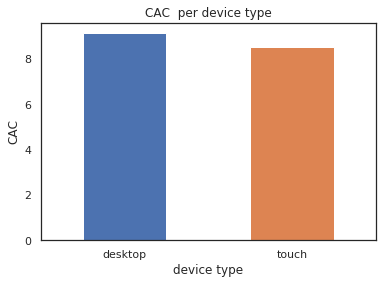

In [155]:
#visualisation CAC per device type
cac_per_device.CAC.plot(kind='bar', label='index', color=['C0', 'C1'])
plt.title('CAC  per device type')
plt.ylabel('CAC')
plt.xlabel('device type')
plt.xticks(rotation=0)
plt.show();

It seems that the CAC for the desktop version is slightly higher (7.03% more ) than the mobile version which means that we really need to focus on improving the mobile as there is no massive difference in the costs.

##### <u>**ROMI per device type**</u> 

We are going to find ROMI (return on marketing investment) per device type by dividing LTV by CAC.


In [156]:
#retreive LTV per device
ltv_per_device = device_metrics[['device','LTV']]
ltv_per_device

,device,LTV
0,desktop,7.0
1,touch,6.0


In [157]:
#merge  LTV per device + CAC per device type

romi_per_device = (
    ltv_per_device.merge(cac_per_device, on='device')
)
romi_per_device

,device,LTV,CAC
0,desktop,7.0,9.13
1,touch,6.0,8.53


In [158]:
#Calculation ROMI per device type in a new column  
romi_per_device['ROMI'] = round(romi_per_device.LTV / romi_per_device.CAC,2)
romi_per_device

,device,LTV,CAC,ROMI
0,desktop,7.0,9.13,0.77
1,touch,6.0,8.53,0.70


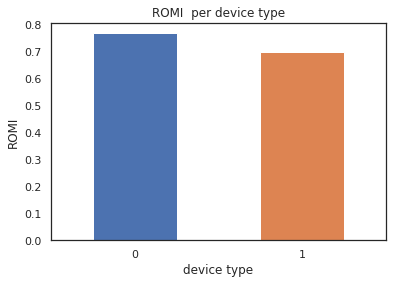

In [159]:
#visualisation ROMI per device type
romi_per_device
romi_per_device.ROMI.plot(kind='bar', color=['C0', 'C1'])
plt.title('ROMI  per device type')
plt.ylabel('ROMI') 
plt.xlabel('device type')
plt.xticks(rotation=0)
plt.show();

We have a slightly  better return on investment with the desktop version : 10% more than the moile version, which still shows that the mobile version has some growth potential.

##### <u>**ROMI per cohorts**</u> 

We are going to analyse ROMI  through Cohort Analysis.

In [160]:
#Let's group cost by month to get the sums of cost 
costs_details = costs.groupby(['month_cost'])\
.agg({'cost_per_day': 'sum'})\
.reset_index()
costs_details
#set values for cost_percent
costs_percent=1

,month_cost,cost_per_day
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [161]:
#Let's rename column cost per day in cost per month 
costs_details =costs_details.rename(columns={'cost_per_day':'monthly_costs'}) 


In [162]:
#Let's group orders by month to get the sums of revenues per order
orders_details= orders.groupby(['month_first_order', 'order_month']).agg({'revenue_per_order': 'sum'}).reset_index()
orders_details

,month_first_order,order_month,revenue_per_order
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [163]:
#renaming columns revenue_per_order : cohort_monthly_revenue
orders_details = orders_details.rename(columns={'revenue_per_order':'cohort_monthly_revenue'})
#creation lifetime value and conversion to correct format in months : ['order_month'] - ['month_first_order']/ np.timedelta64(1, 'M')

orders_details['cohort_lifetime'] = ((orders_details['order_month'] \
                          - pd.to_datetime(orders_details['month_first_order'])) /\
                         np.timedelta64(1, 'M')).round().astype('int')
orders_details

,month_first_order,order_month,cohort_monthly_revenue,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [164]:
#Casting month_cost 
costs_details['month_cost'] = pd.to_datetime(costs_details['month_cost'])

In [165]:
#merging orders_details + costs_details
report = orders_details.merge(costs_details, how='outer', 
                       left_on='month_first_order', 
                       right_on='month_cost')

report



,month_first_order,order_month,cohort_monthly_revenue,cohort_lifetime,month_cost,monthly_costs
0,2017-06-01,2017-06-01,9557.49,0,2017-06-01,18015.00
1,2017-06-01,2017-07-01,981.82,1,2017-06-01,18015.00
2,2017-06-01,2017-08-01,885.34,2,2017-06-01,18015.00
3,2017-06-01,2017-09-01,1931.30,3,2017-06-01,18015.00
4,2017-06-01,2017-10-01,2068.58,4,2017-06-01,18015.00
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2,2018-03-01,30415.27
75,2018-04-01,2018-04-01,10600.69,0,2018-04-01,22289.38
76,2018-04-01,2018-05-01,1209.92,1,2018-04-01,22289.38
77,2018-05-01,2018-05-01,13925.76,0,2018-05-01,22224.27


In [166]:
#check missing values 
report.isnull().sum()


month_first_order         0
order_month               0
cohort_monthly_revenue    0
cohort_lifetime           0
month_cost                1
monthly_costs             1
dtype: int64

In [167]:
#dropping null values 
report.dropna(inplace=True)

In [168]:
#Calculation ROMI 
report['ROMI'] = report['cohort_monthly_revenue'] / report['monthly_costs']

In [169]:
#making a pivot table

ROMI_details = report.pivot_table(index='month_first_order',
                            columns='cohort_lifetime',
                            values='ROMI',
                            aggfunc='mean').cumsum(axis=1)
ROMI_details.index = pd.Series(ROMI_details.index).dt.strftime('%Y-%m')

In [170]:
ROMI_details

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,
2017-06,0.530530,0.585030,0.634174,0.741379,0.856205,0.938798,1.045528,1.110838,1.172961,1.240989,1.305138,1.333982
2017-07,0.633623,0.668962,0.734697,0.772542,0.791180,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,NaN
2017-08,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.740230,0.767297,0.784708,NaN,NaN
2017-09,0.597833,0.716200,0.771374,1.192464,1.234889,1.303422,1.377732,1.403485,1.422974,NaN,NaN,NaN
2017-10,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.746150,0.759947,NaN,NaN,NaN,NaN
2017-11,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,NaN,NaN,NaN,NaN,NaN
2017-12,0.542015,0.571800,0.677624,0.799484,0.835281,0.873951,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.416173,0.445835,0.476455,0.490823,0.497132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.463807,0.494855,0.503615,0.511887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
#remove zero
ROMI_details.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,
2017-06,0.530530,0.58503,0.634174,0.741379,0.856205,0.938798,1.04553,1.11084,1.17296,1.24099,1.30514,1.33398
2017-07,0.633623,0.668962,0.734697,0.772542,0.79118,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,
2017-08,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.74023,0.767297,0.784708,,
2017-09,0.597833,0.7162,0.771374,1.19246,1.23489,1.30342,1.37773,1.40349,1.42297,,,
2017-10,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.74615,0.759947,,,,
2017-11,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,,,,,
2017-12,0.542015,0.5718,0.677624,0.799484,0.835281,0.873951,,,,,,
2018-01,0.416173,0.445835,0.476455,0.490823,0.497132,,,,,,,
2018-02,0.463807,0.494855,0.503615,0.511887,,,,,,,,


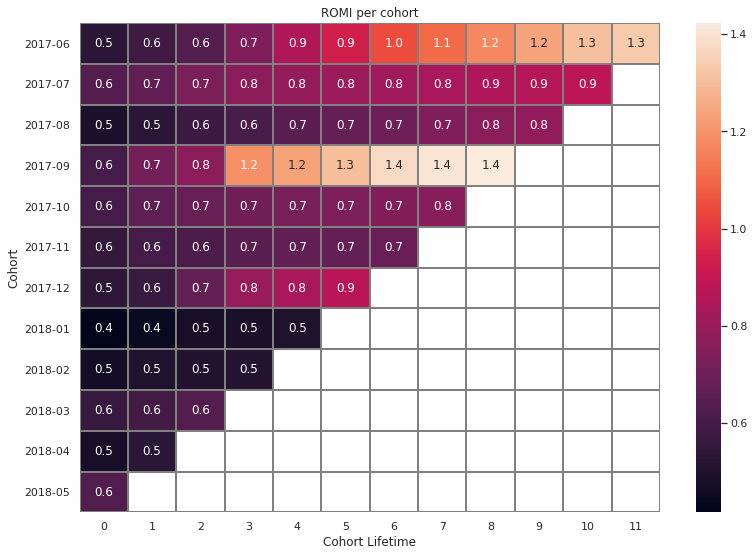

In [172]:
#plotting the heatmap'ROMI per cohort'
 
plt.figure(figsize=(13, 9))
plt.title('ROMI per cohort')

sns.heatmap(
    ROMI_details,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
plt.ylabel('Cohort') 
plt.xlabel('Cohort Lifetime')
plt.show();

There is a contrast in performance among the cohorts.<br>

We can see that the first cohort is leading again here by being the only one paid off from the 7th month.<br>

The cohort from september 2017 is also showing some positivity in the same proportion as its LTV as we saw earlier ,but it is difficult to say if it is a trend or rather a single isolated fact. <br>

Both cohorts  are clearly standing out from the remaining cohorts.<br>

There is a significant issue here demonstrated by this visualisation : 
**there is a huge decline in return on investment after the first cohort**.
<br>
=> Maybe the market place became more competitive and the company lost its competitive advantage towards  new market entrants 

In [173]:
#Calculation cumulative ROMI 6 months
mean_Romi_6months = round(ROMI_details.mean()[:7].to_frame('ROMI'),2)

In [174]:
mean_Romi_6months

,ROMI
cohort_lifetime,
0,0.54
1,0.58
2,0.63
3,0.72
4,0.78
5,0.86
6,0.90


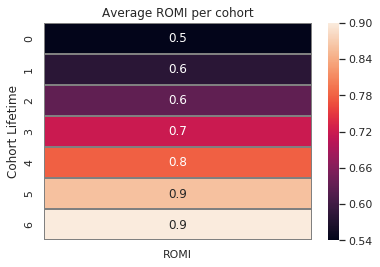

In [175]:
plt.title('Average ROMI per cohort')
sns.heatmap(
    mean_Romi_6months,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',)
plt.ylabel('Cohort Lifetime') 
plt.show();

On average, cohorts are close to pay off towards the end of the 6th month.<br>
We can explain that in general  over the time expenses increased, and so does the number of new customers.<br>
Revenues take a bit longer to catch up to expenses.

## <u>**Conclusion**</u> <br>

* What sources/platforms would you recommend? 
* what metrics did you focus on? Why? 
* What conclusions did you draw after finding the metric values?

We found this study interesting because we have applied some economics concepts in a practical situation which required to proceed in multiple steps to achieve the desired results.<br>

Overall it was some good quality data with no missing values that we were provided but we had to modify the format for timestamps and dates to be able to perform our analysis.<br>

The main difficulty was to create some cohorts considering the first month of session and first month of order to be able to obtain the needed metrics at the end.<br>

From the output  we established that the platforms register in average a number of 908 users per day and it turned that most of users make their purchases within their first visit and mosly within one minute.<br>
The average number of orders per month on average per user is 1.12 which is pretty low.<br>
We can deduct that users knew already what they wanted because of a promotion or ad campaign that redirected them to the platform.<br>
If users don't stay too long on the platform it means that the content should be improved to retain users in order for them to explore more features of the service.<br>

We determined also there was a factor of seasonality regarding the usage of the platform : users use less the platform in summer and more during the winter especially from October to March.<br>
It seems that people adopt different lifestyle in summer and choose probably outdoor activities instead.<br>

Through our calculations of the Product Stickiness Ratio on a weekly basis we highlighted that the frequency of usage was better on a weekly basis than daily.<br>
This indicates that the platform is a product with weekly usage because of a very high incidence of people returning each week and this is a fact that we won't be able to alter.<br>

After the cohort analysis we noticed that the number of users and the revenues drop drastically after the first month which indicates that the platform is losing its attractiveness, perhaps a promotion campaign has ended or new incomers on the market raised the competitiveness.<br>
The company may have lost its competitive advantage towards new market entrants.<br>
Only the first cohort around the 7th month is able to generate some Return on Investment, for the other months the situation gets worse.<br>

Regarding the devices, the desktop version is used at 83% and also generates much more revenues than the mobile version. <br>
This fact reveals an underlying issue with the mobile version that engineers need to tackle.<br>
Mobility  is becoming more and more prominent and the company is missing a huge segment of users looking for more flexibilty and freedom.Also the mobile version showed some growth potentia.<br>
Reliying only on the desktop version will show some limits in a near future.<br>

Still in same proportion of usage we noticed that expenses increase in Winter times due to seasonality factor.<br>

The source 3 accounts for 43 % of total cost per source, source 1/10/9 seem to not cost a lot and 6-7-8 are not used at all.<br>
source 1,2,5 seem to be the most profitable on the long term but not 4 , 9, 10.<br>
The CAC for source 4 is out of proportion compared to the remaining sources , something needs to be done to assess why it is such high .<br>
Source 3 is facing big difficulties with :

* low ROMI
* highest number of users
* highest CAC
* highest cost per source
* lowest LTV

From the figures the business doesn't seem to be quite healthy at the moment :
* we have a negative gross profit -77074.42 
* CAC are superior to LTV  
* the ROMI is not there yet <br>

Nevertheless there is a massive growth potential and we have few recommendation for the Business :

* improve the design and check for potential bugs of the platform to retain users longer so they can explore other features

* develop further the mobile version to attract more users and maybe revert the device usage and revenue trends

* once the mobile version will be updated,marketing campaign should focus on promoting this channel device as it is the future 

* Keep focus on source 1,2,5 as they are the most profitable and try to reduce cost for source 3